In [1]:
require(mgcv)
require(itsadug)
require(readr)
require(dplyr)
require(ggplot2)
require(showtext)
showtext_auto()

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-35. For overview type 'help("mgcv-package")'.

Loading required package: itsadug

Loading required package: plotfunctions

Loaded package itsadug 2.4 (see 'help("itsadug")' ).

Loading required package: readr

Loading required package: dplyr


Attaching package: ‘dplyr’


The following object is masked from ‘package:nlme’:

    collapse


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:plotfunctions’:

    alpha


Loading required package: showtext

Loading required package: sysfonts

Loading required package: showtextdb



In [2]:
popt = function(w,h,r){
    options(repr.plot.width=w, repr.plot.height=h, repr.plot.res=r)
}

In [3]:
data = read_csv("../../data/casper/cadet_JanMay.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  opid = col_character(),
  year = col_double(),
  woy = col_double(),
  source = col_character(),
  entity = col_character(),
  category = col_character(),
  attribute = col_character(),
  rating = col_double(),
  text = col_character()
)




In [4]:
names(data)

[1] "opid"      "year"      "woy"       "source"    "entity"    "category" 
[7] "attribute" "rating"    "text"

In [5]:
pol_data = data[(data$rating!=0) & (data$year==2021),2:8]
pol_data$rating = (pol_data$rating+1)/2
nrow(pol_data)

[1] 22454

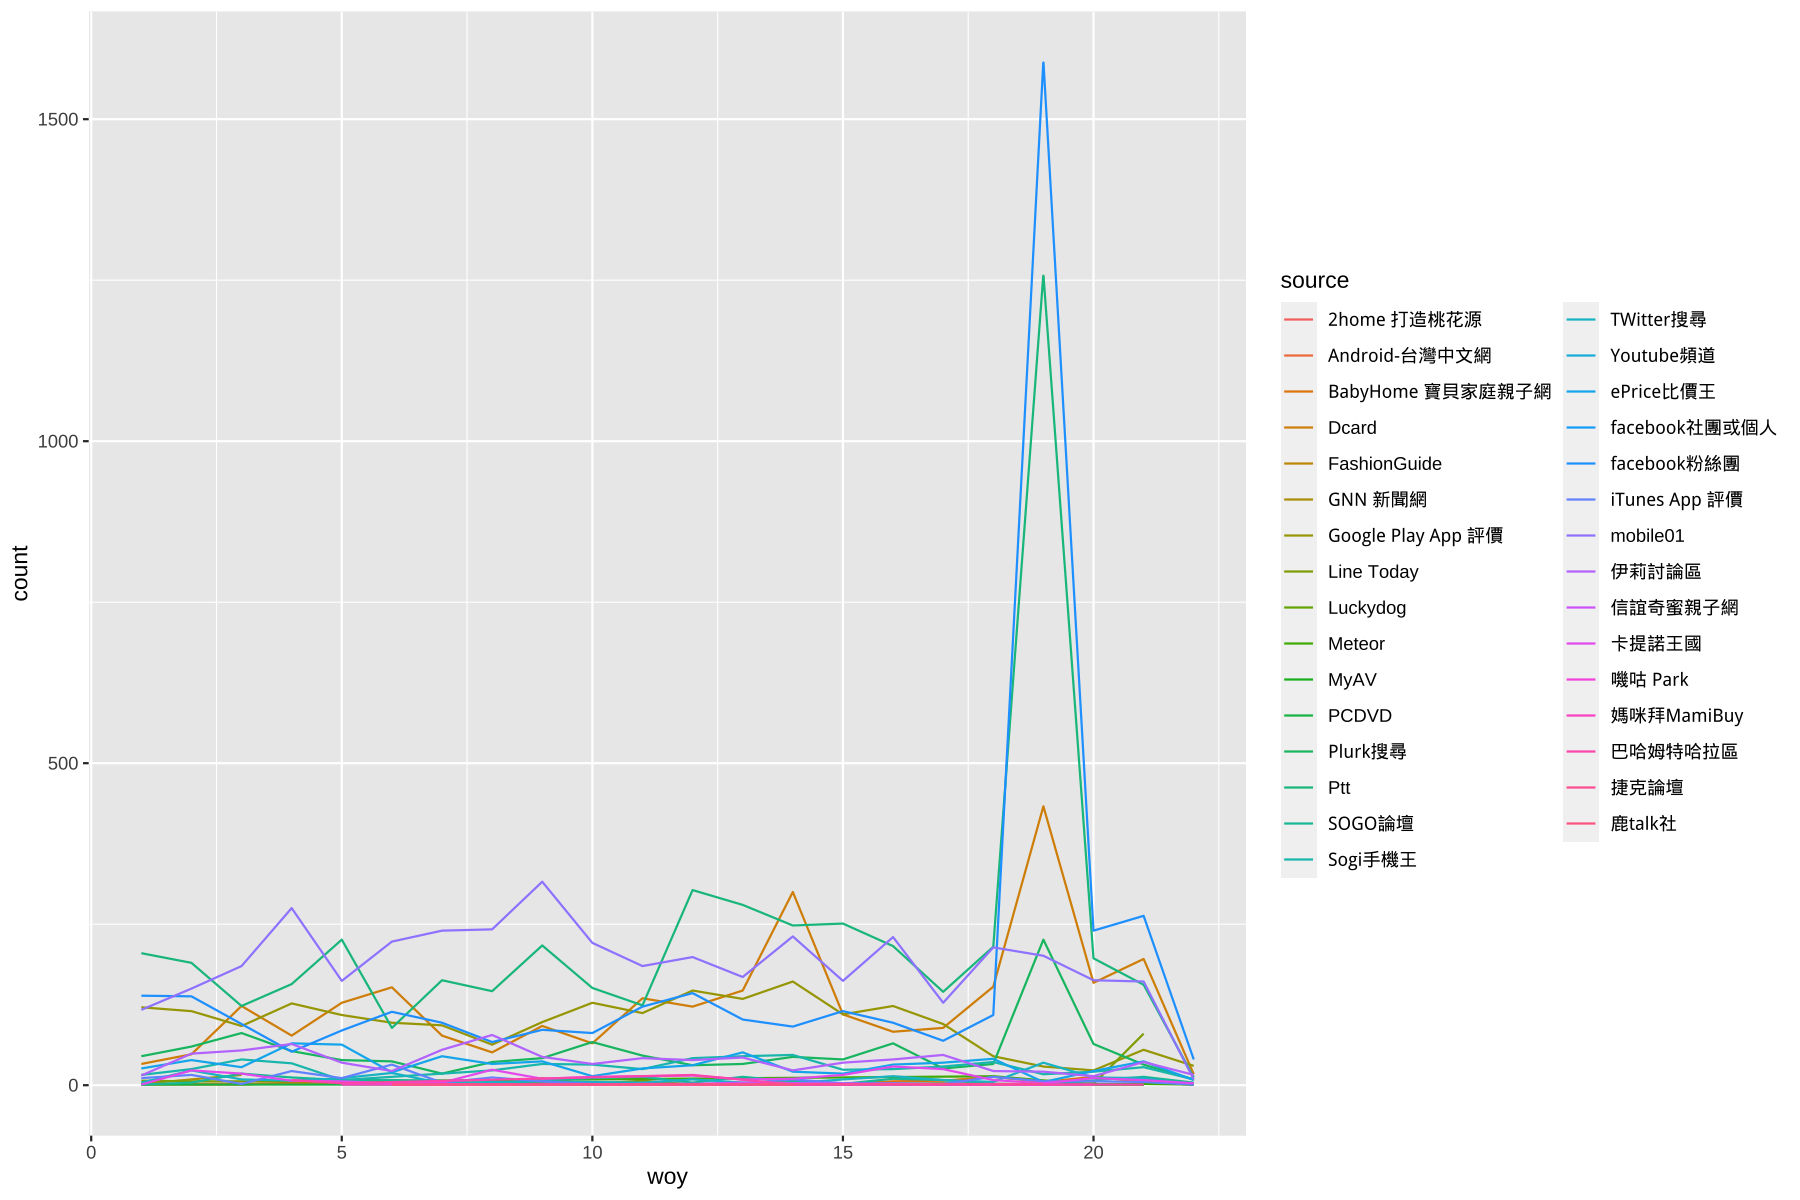

In [8]:
popt(12,8,150)
ggplot(pol_data, aes(x=woy, color=source)) + geom_line(stat="count")

In [9]:
pol_data %>% filter(woy==19) %>% group_by(source) %>% count() %>% arrange(desc(n))

source                  n   
1  facebook粉絲團          1588
2  Ptt                     1257
3  Dcard                    433
4  Plurk搜尋                226
5  mobile01                 201
6  TWitter搜尋               35
7  Google Play App 評價      29
8  伊莉討論區                21
9  Sogi手機王                17
10 iTunes App 評價            6
11 BabyHome 寶貝家庭親子網    5
12 ePrice比價王               5
13 卡提諾王國                 3
14 SOGO論壇                   2
15 捷克論壇                   2
16 Line Today                 1
17 Luckydog                   1
18 facebook社團或個人         1
19 信誼奇蜜親子網             1
20 巴哈姆特哈拉區             1

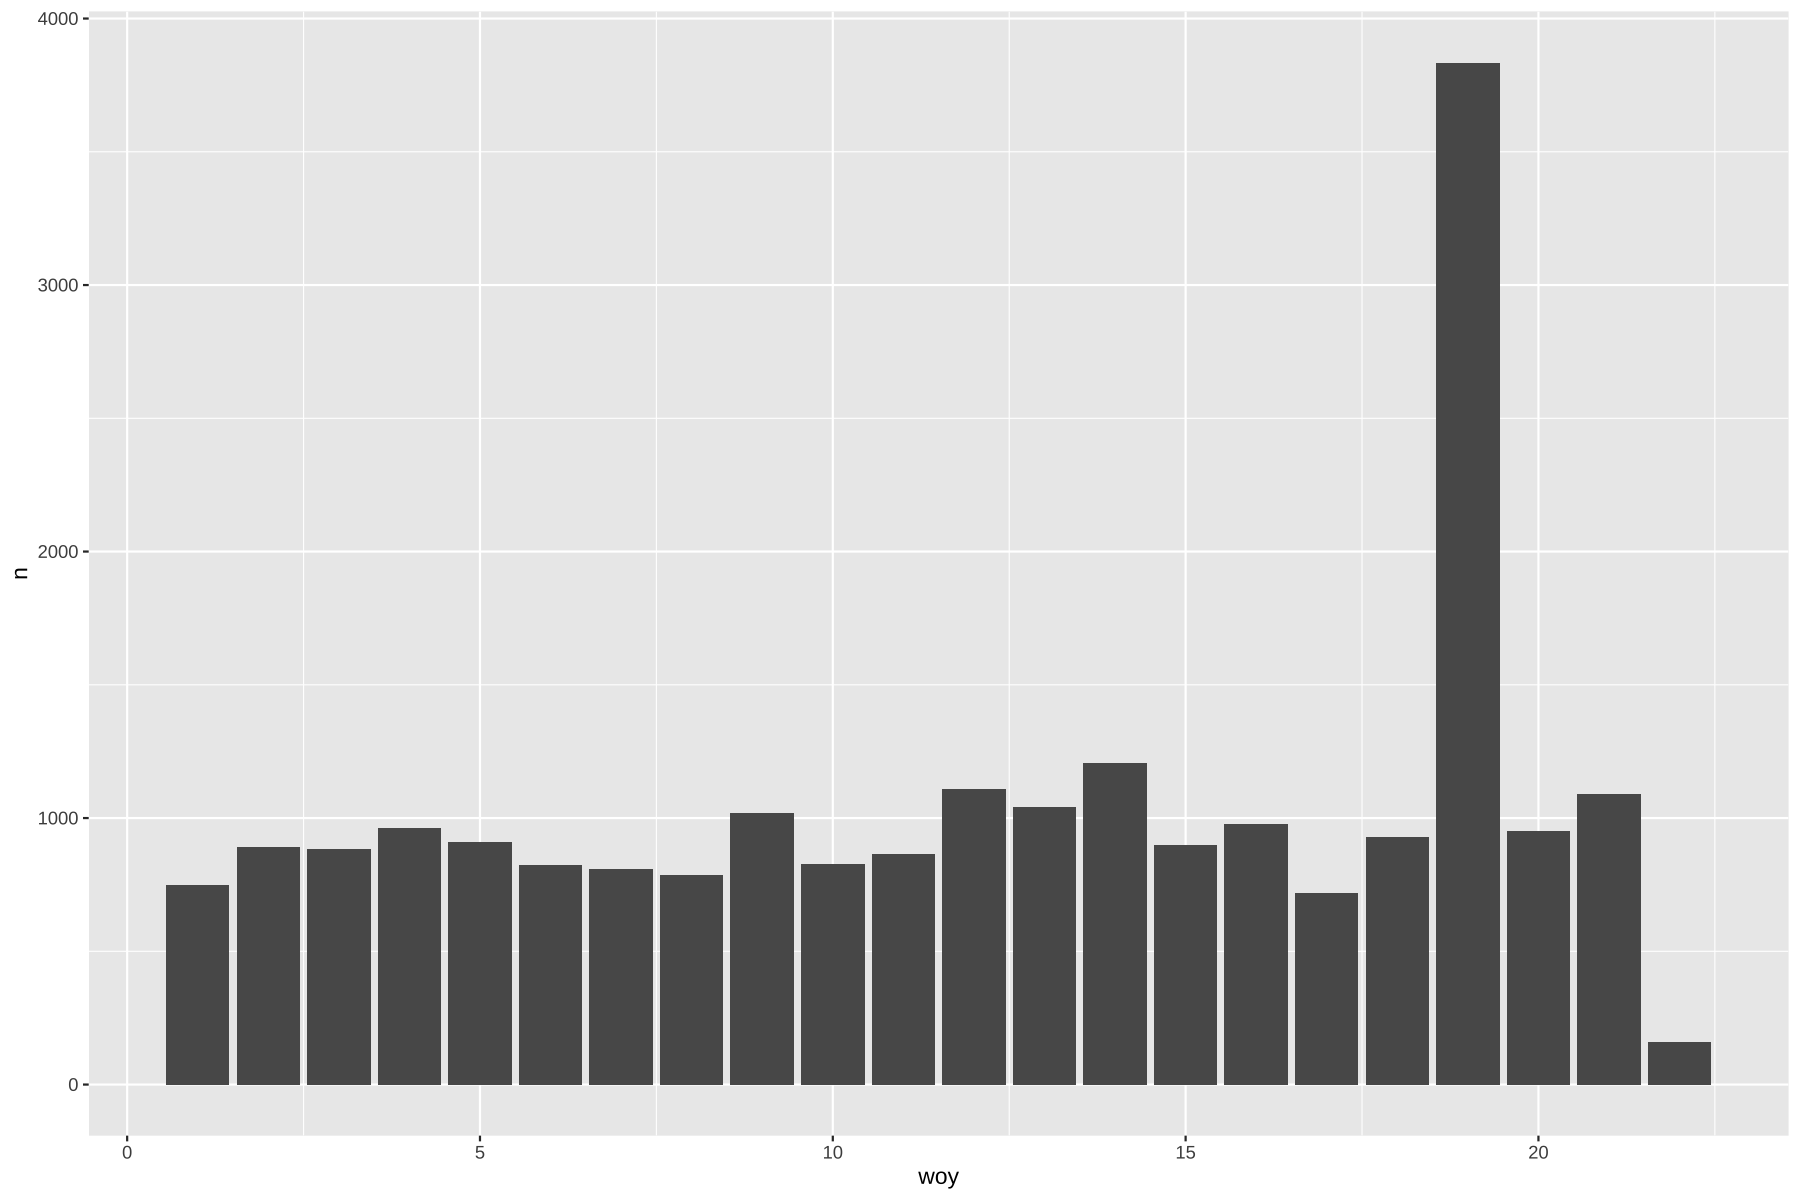

In [10]:
ggplot(data = pol_data %>% group_by(woy) %>% summarise(n=n()),
      aes(x=woy, y=n)) + geom_col()

[1] 4660

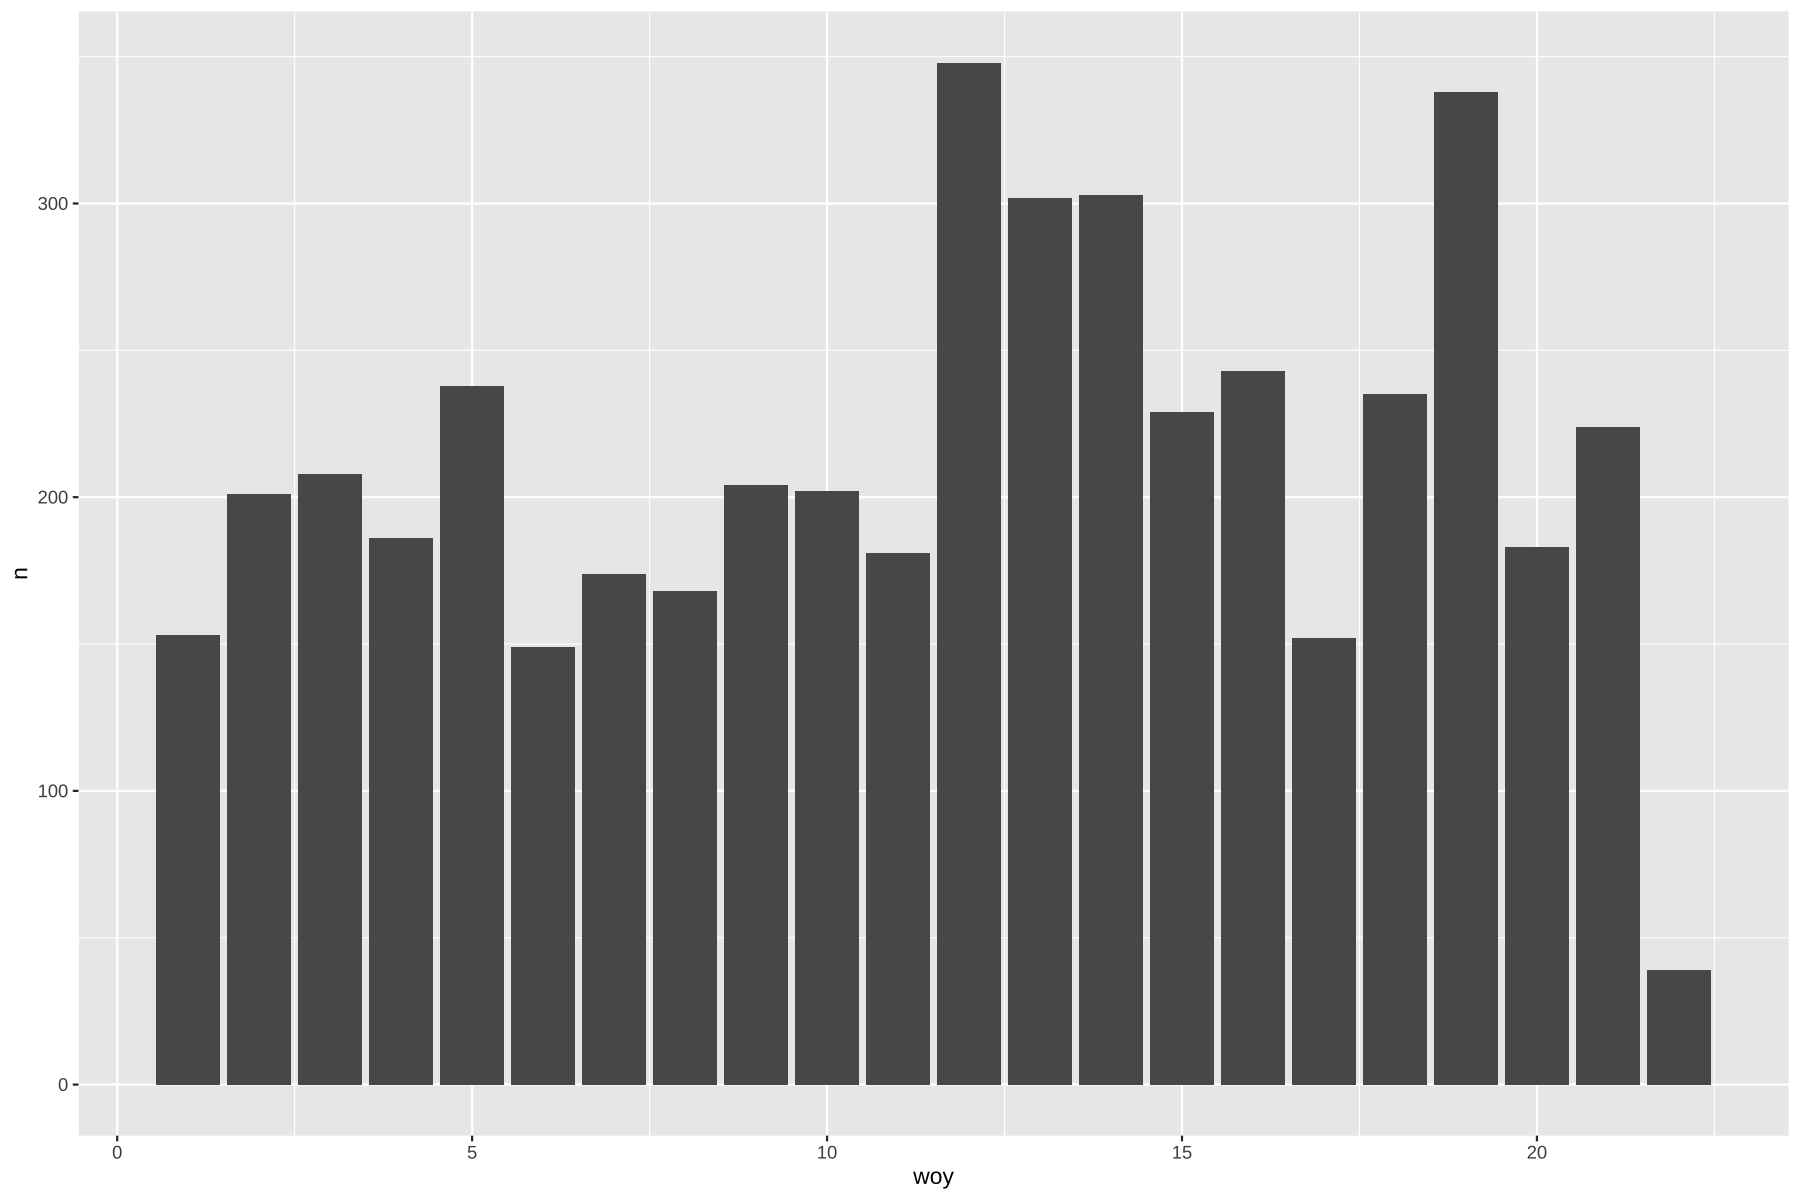

In [11]:
cht_data = pol_data[pol_data$entity=="中華電信", ]
nrow(cht_data)
ggplot(data = cht_data %>% group_by(woy) %>% summarise(n=n()),
      aes(x=woy, y=n)) + geom_col()

`summarise()` has grouped output by 'entity'. You can override using the `.groups` argument.



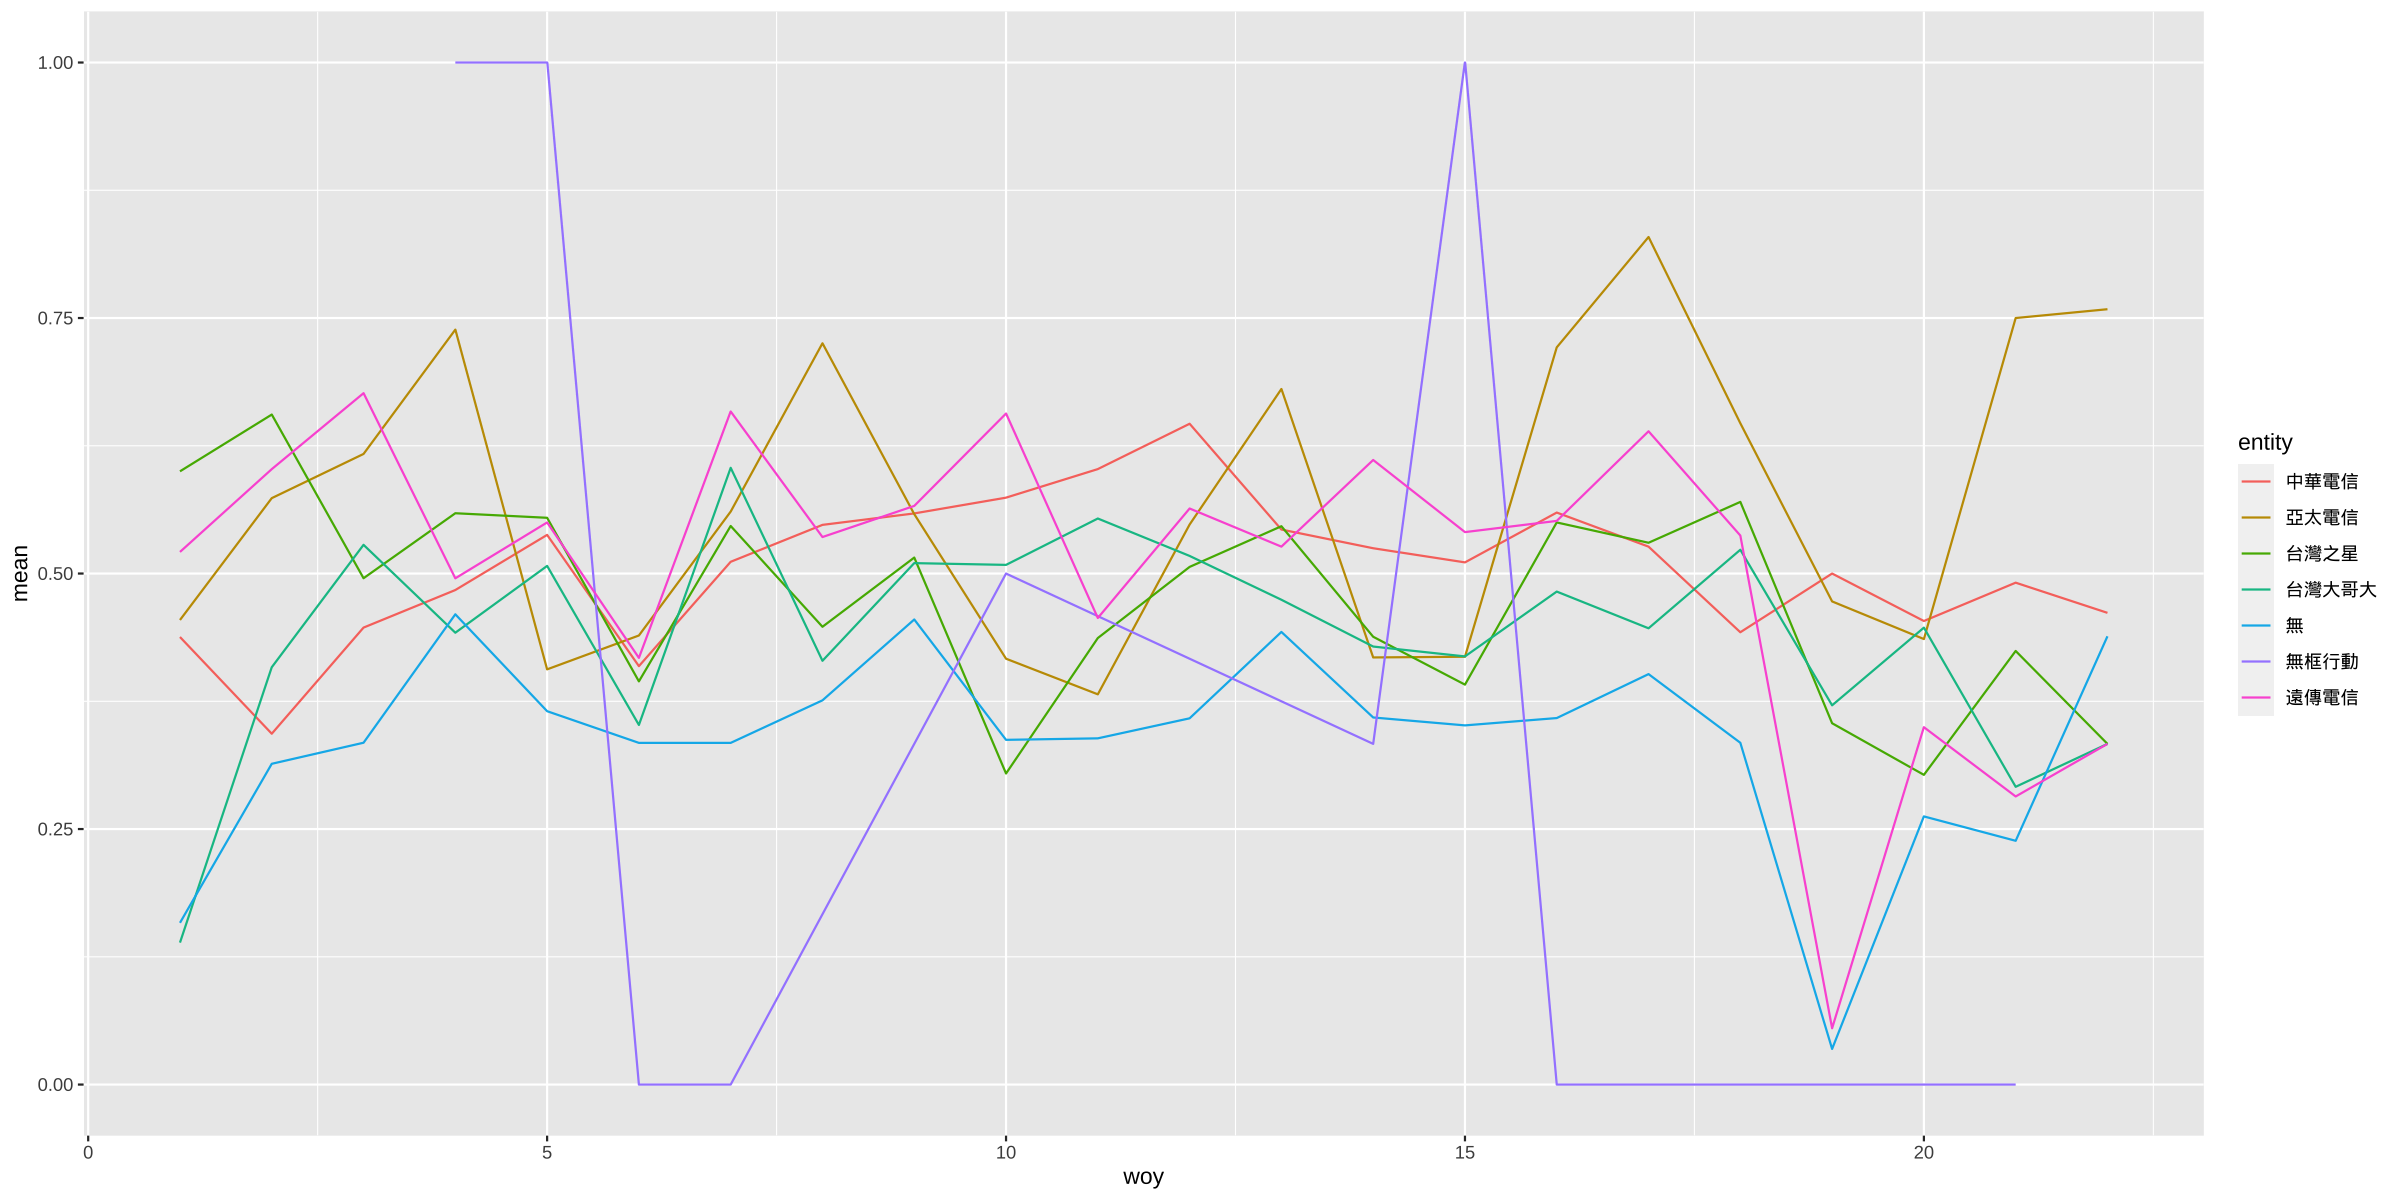

In [33]:
ggplot(data = pol_data %>% 
               group_by(entity, woy) %>% 
               summarise(mean=mean(rating)),
      aes(x=woy, y=mean, color=entity)) + geom_line()

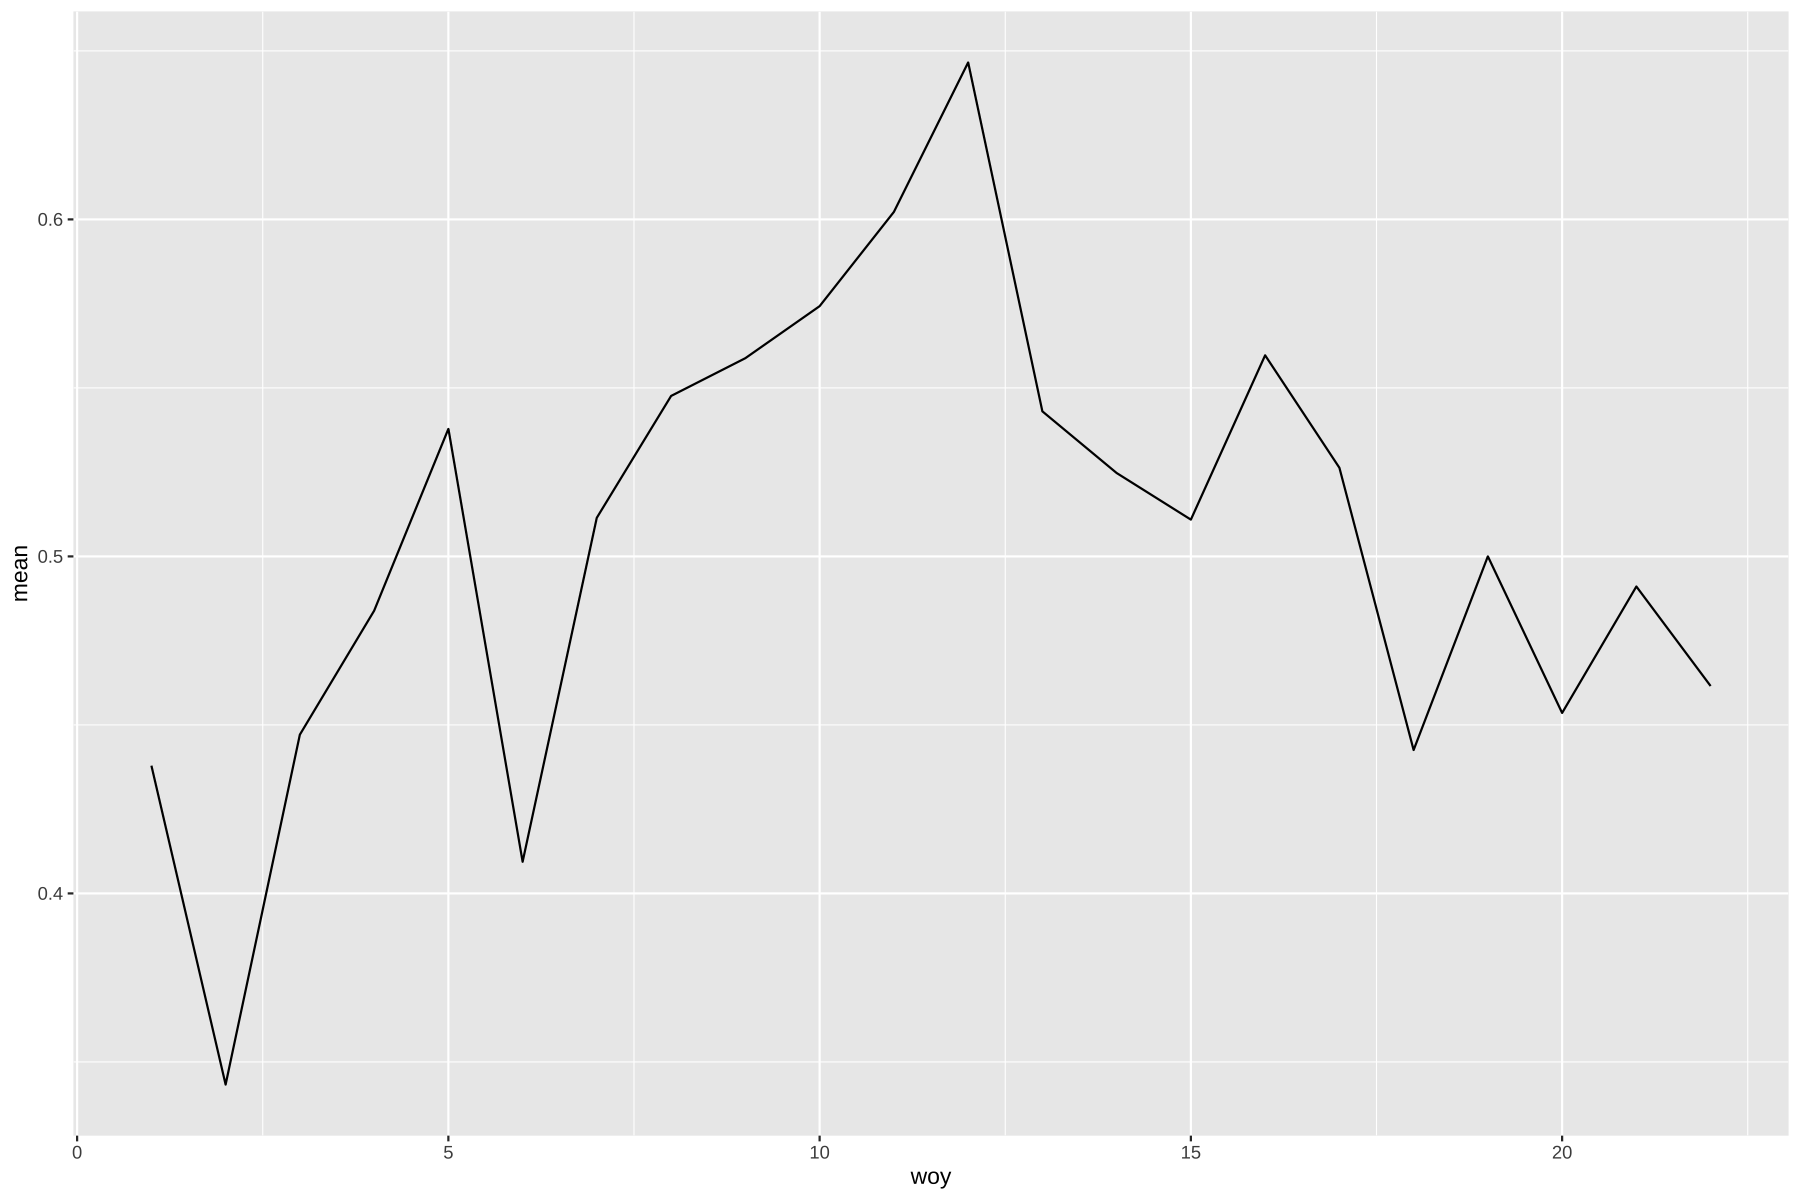

In [12]:
ggplot(data = cht_data %>% 
               group_by(woy) %>% 
               summarise(mean=mean(rating)),
      aes(x=woy, y=mean)) + geom_line()

In [13]:
cht_data$category = relevel(factor(cht_data$category), "無")
xtabs(~woy+category, cht_data)

    category
woy   無 其他 加值服務 資費方案 通訊品質
  1   47    8       31       20       47
  2   50   17       21       49       64
  3   43   21       18       46       80
  4   32   16       14       62       62
  5   71   13        9       41      104
  6   50    9        0       25       65
  7   35   14        4       35       86
  8   28    3        5       54       78
  9   52   14       22       43       73
  10  33   15        9       65       80
  11  33   15       11       46       76
  12  39    9      190       49       61
  13  58   16       84       54       90
  14  60   17       49       63      114
  15  44   19       40       53       73
  16  45   13       35       53       97
  17  38   12       16       25       61
  18  41    8       52       54       80
  19 127   18       43       66       84
  20  46    9        7       45       76
  21  56   23       17       45       83
  22   8    2        2        2       25

In [14]:
m1 = bam(rating~category+s(woy, by=category), data = cht_data, family="binomial", method="ML")

In [15]:
summary(m1)


Family: binomial 
Link function: logit 

Formula:
rating ~ category + s(woy, by = category)

Parametric coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)      -0.001483   0.063251  -0.023   0.9813  
category其他     -0.288815   0.135526  -2.131   0.0331 *
category加值服務  0.278407   0.122555   2.272   0.0231 *
category資費方案  0.200061   0.089813   2.228   0.0259 *
category通訊品質 -0.072430   0.080193  -0.903   0.3664  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                          edf Ref.df Chi.sq p-value    
s(woy):category無       2.423  3.019 14.403 0.00242 ** 
s(woy):category其他     1.001  1.001  4.818 0.02818 *  
s(woy):category加值服務 5.405  6.474 59.114 < 2e-16 ***
s(woy):category資費方案 1.001  1.002  0.236 0.62712    
s(woy):category通訊品質 2.082  2.602  6.572 0.09284 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.0277   Deviance explained =  2.3%
-ML 

In [16]:
require(RColorBrewer)

Loading required package: RColorBrewer



Summary:
	* category : factor; set to the value(s): 其他, 加值服務, 無, 資費方案, 通訊品質. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* NOTE : No random effects in the model to cancel.
 


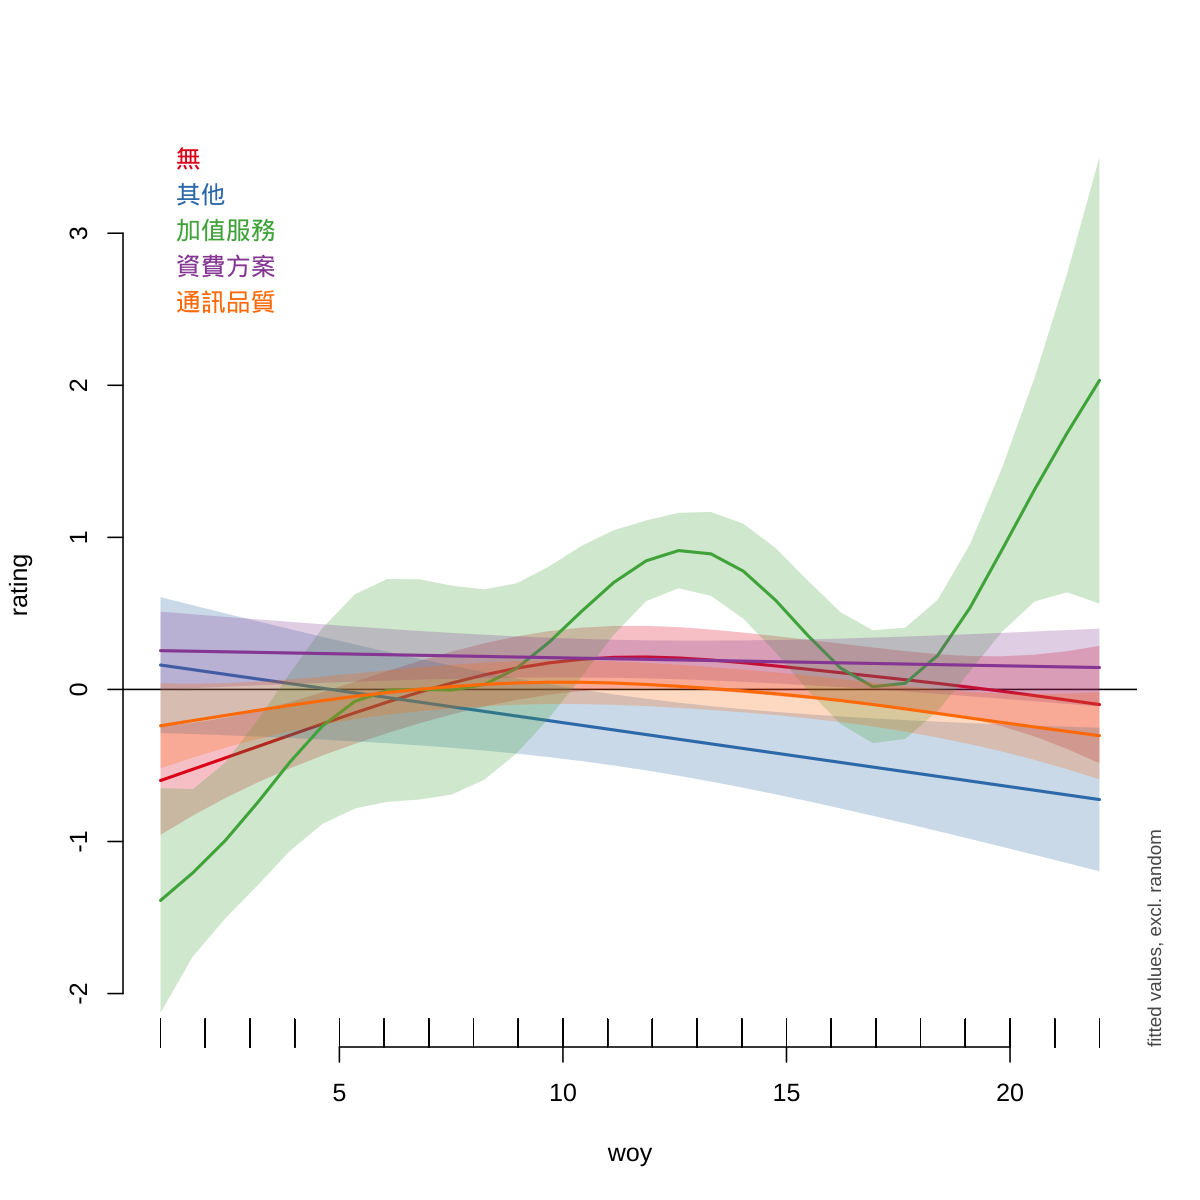

In [17]:
popt(8, 8, 150)
palette(brewer.pal(n = 8, name = "Set2"))
plot_smooth(m1, view="woy", plot_all="category",
            col=brewer.pal(8, "Set1"), lwd=2, legend_plot_all="topleft")

[1] 17794

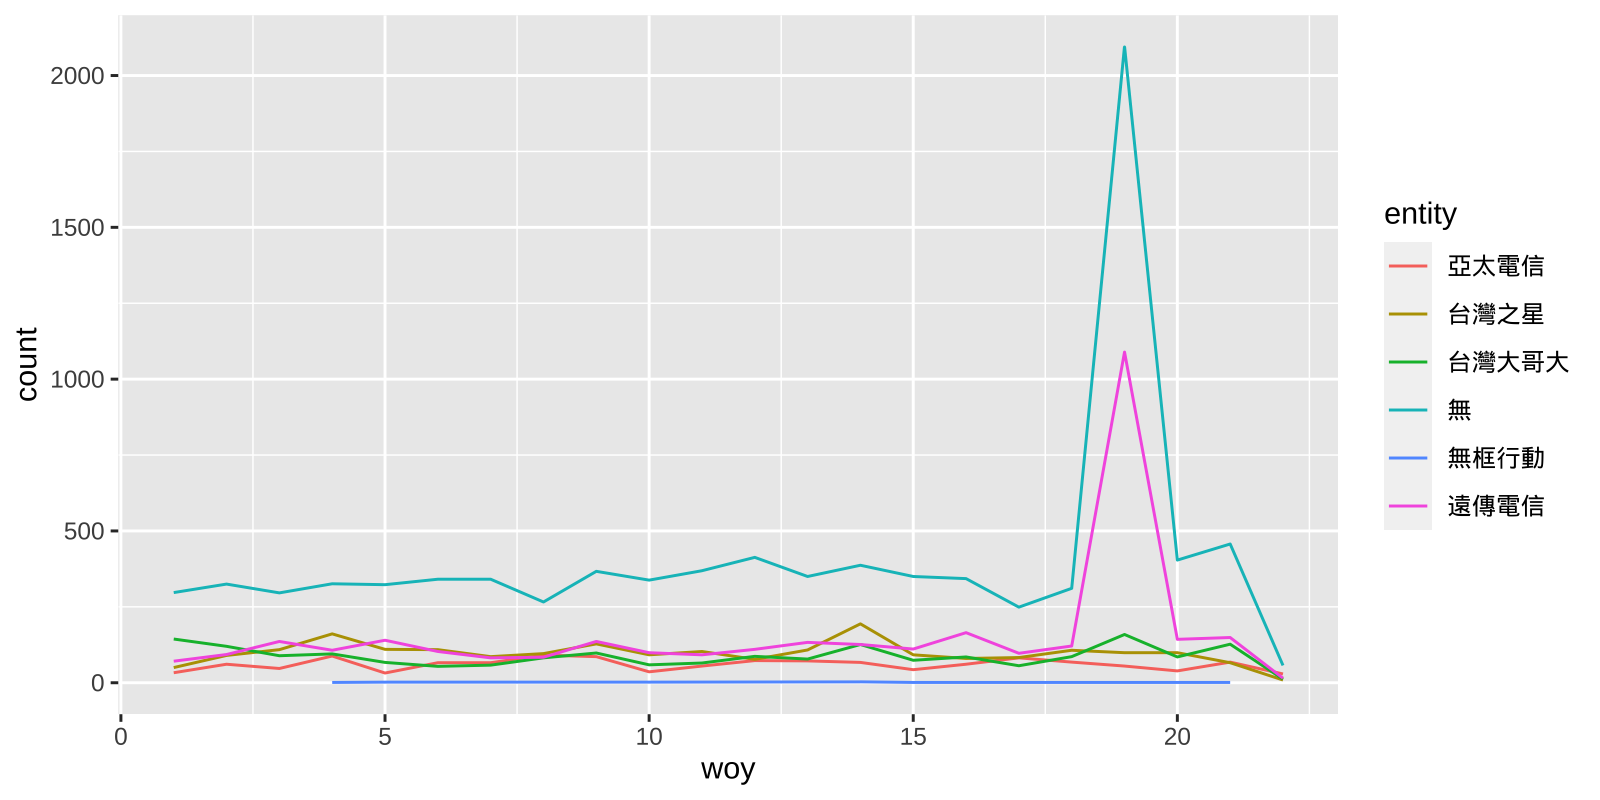

In [18]:
popt(8,4, 200)
ent_data = pol_data[pol_data$entity!="中華電信", ]
nrow(ent_data)
ggplot(ent_data, aes(x=woy, color=entity)) + geom_line(stat="count")


Method: ML   Optimizer: outer newton
full convergence after 6 iterations.
Gradient range [-0.001114877,6.320278e-12]
(score 6620.552 & scale 1).
Hessian positive definite, eigenvalue range [0.001014014,0.9927313].
Model rank =  50 / 50 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                          k'  edf k-index p-value    
s(woy):category無       9.00 2.42    0.74  <2e-16 ***
s(woy):category其他     9.00 1.00    0.74  <2e-16 ***
s(woy):category加值服務 9.00 5.41    0.74  <2e-16 ***
s(woy):category資費方案 9.00 1.00    0.74  <2e-16 ***
s(woy):category通訊品質 9.00 2.08    0.74  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


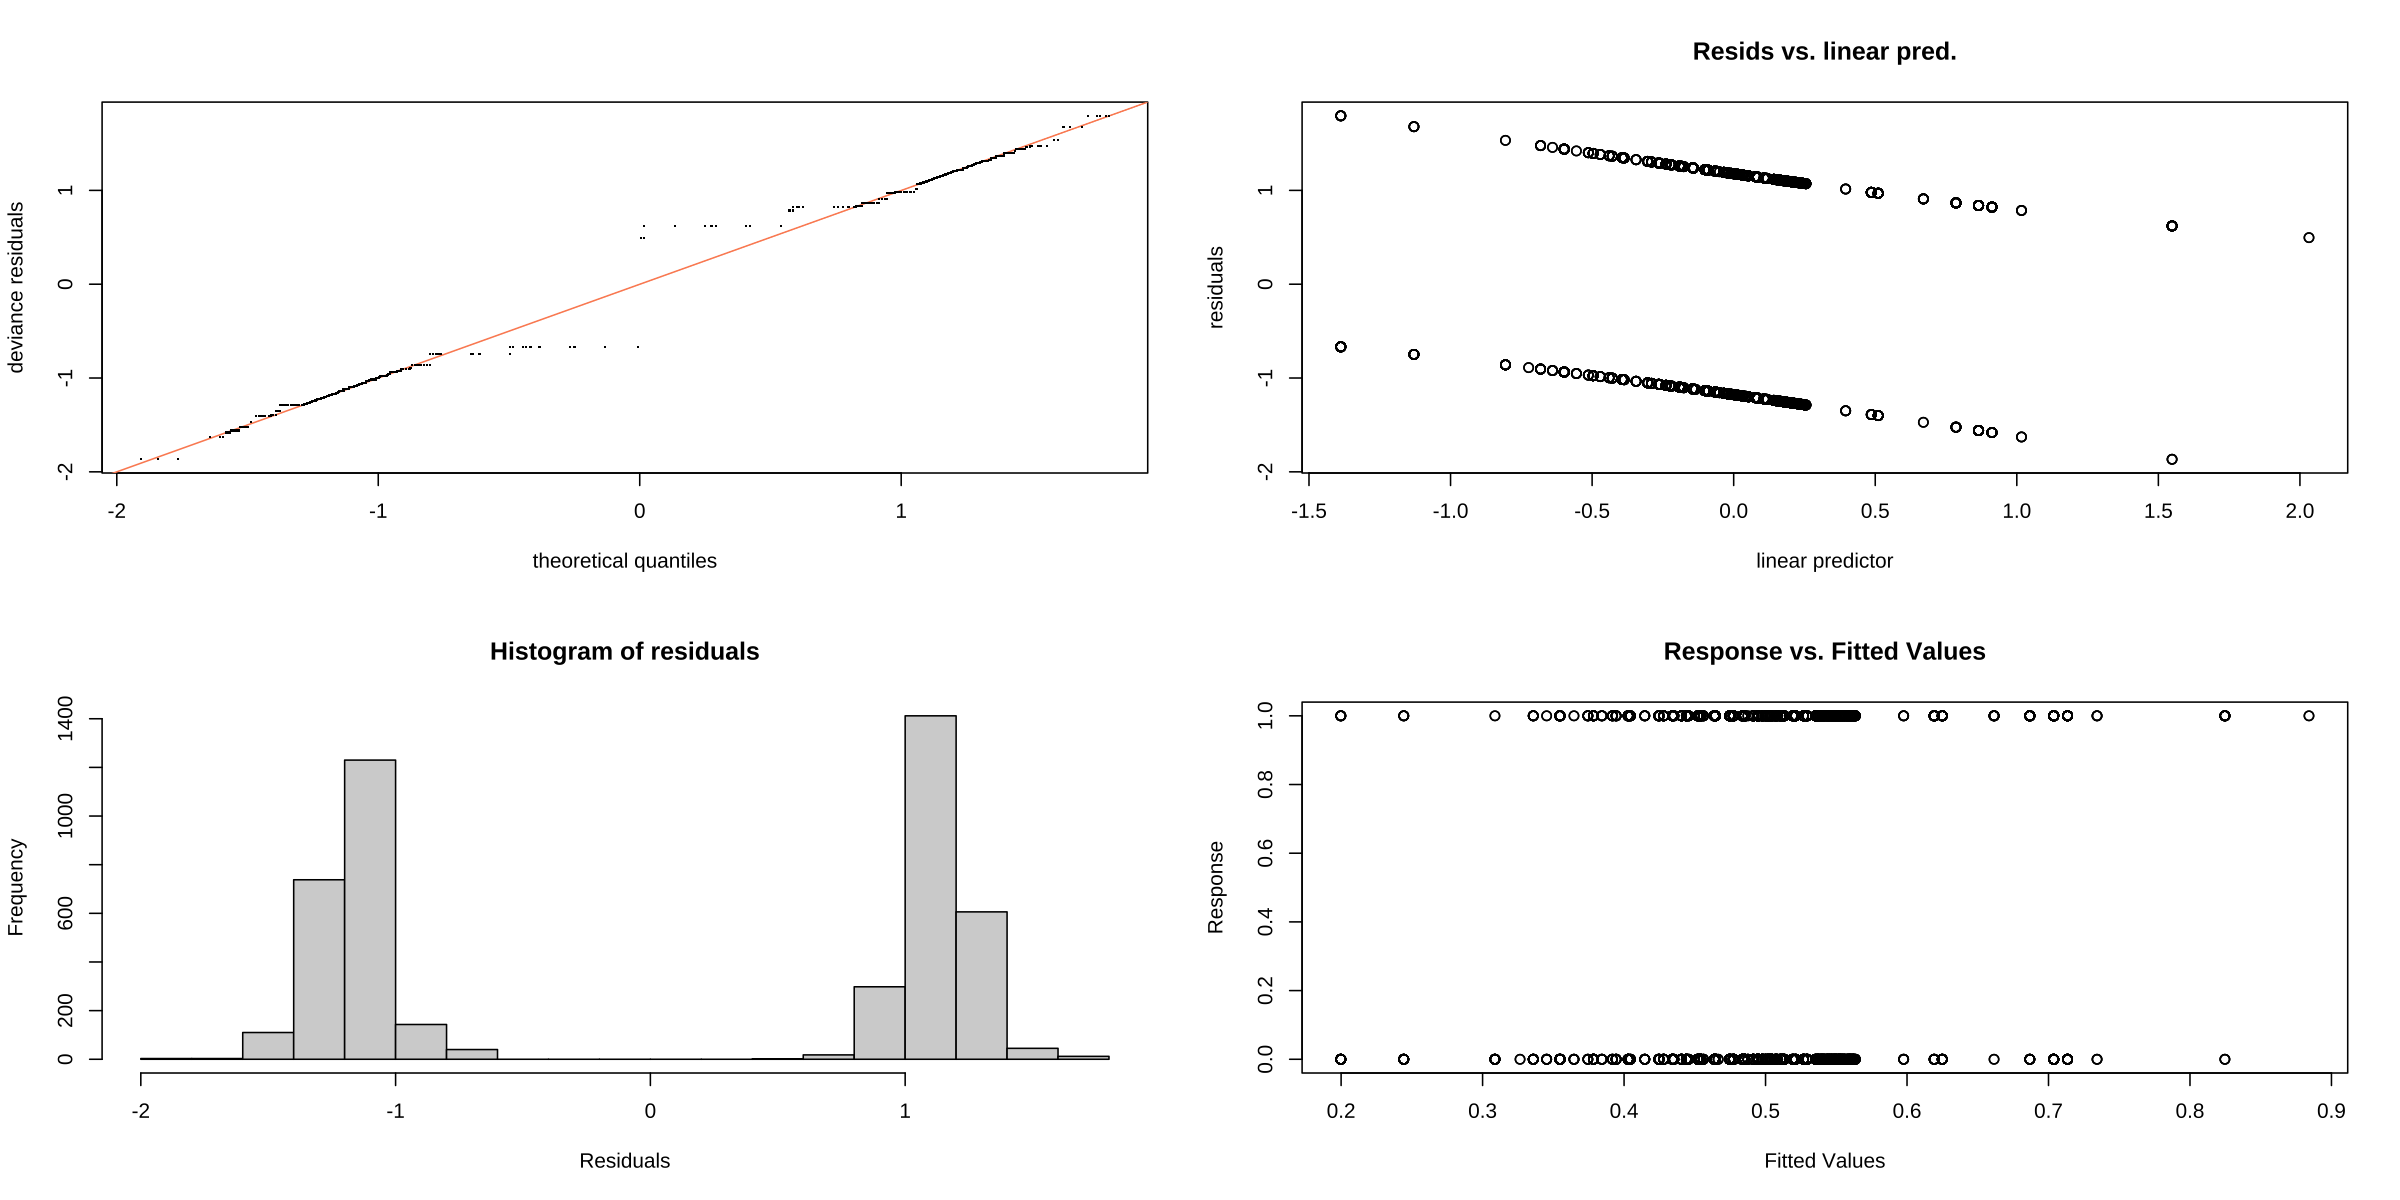

In [31]:
gam.check(m1)

In [19]:
range(data$woy)

[1]  1 53

In [20]:
ent_data$entity = relevel(factor(ent_data$entity), ref="遠傳電信")
m2 = bam(rating~entity+s(woy, by=entity), data = ent_data[ent_data$entity!="無框行動", ], family="binomial", method="ML")
summary(m2)


Family: binomial 
Link function: logit 

Formula:
rating ~ entity + s(woy, by = entity)

Parametric coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.41933    0.04009 -10.460  < 2e-16 ***
entity亞太電信    0.82456    0.07056  11.686  < 2e-16 ***
entity台灣之星    0.29356    0.06155   4.769 1.85e-06 ***
entity台灣大哥大  0.16036    0.06328   2.534   0.0113 *  
entity無         -0.65193    0.04797 -13.590  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                          edf Ref.df  Chi.sq  p-value    
s(woy):entity遠傳電信   8.674  8.966 576.075  < 2e-16 ***
s(woy):entity亞太電信   1.730  2.162   6.403 0.051205 .  
s(woy):entity台灣之星   3.155  3.930  22.673 0.000122 ***
s(woy):entity台灣大哥大 6.481  7.596  59.154  < 2e-16 ***
s(woy):entity無         8.804  8.988 672.043  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.124   Deviance explained = 

Summary:
	* entity : factor; set to the value(s): 亞太電信, 台灣之星, 台灣大哥大, 無, 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* NOTE : No random effects in the model to cancel.
 


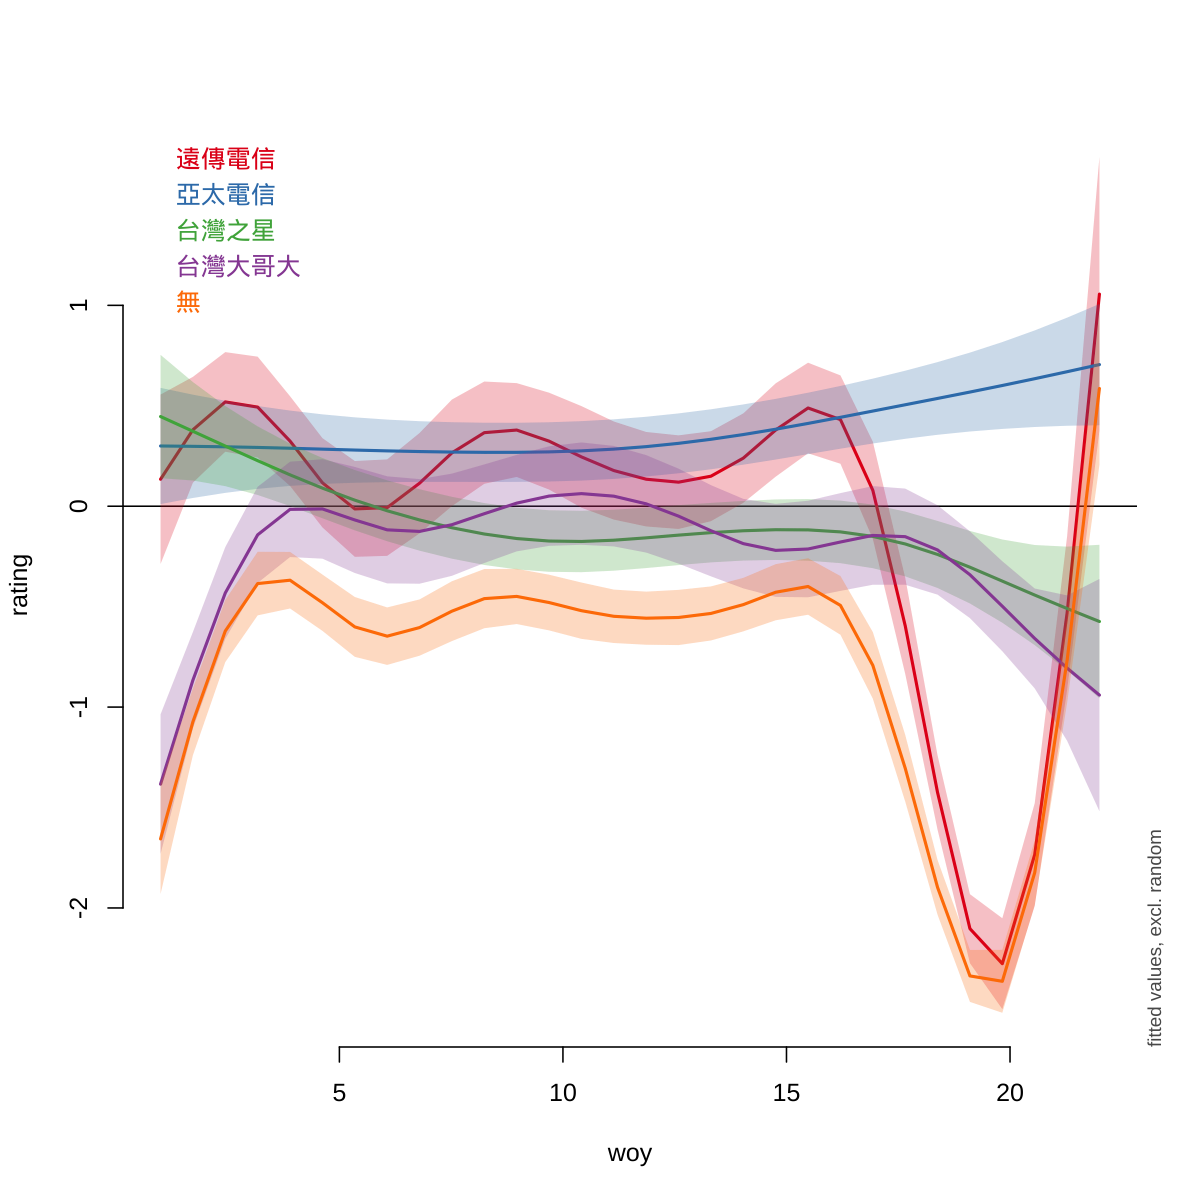

In [21]:
popt(8, 8, 150)
plot_smooth(m2, view="woy", plot_all="entity", 
            col=brewer.pal(8, "Set1"), lwd=2, legend_plot_all="topleft")

In [22]:
ent_data$entity = relevel(factor(ent_data$entity), ref="遠傳電信")
ent_data$source = factor(ent_data$source)
m3_data = ent_data[ent_data$entity!="無框行動", ]
m3 = bam(rating~entity+s(woy, by=entity)+s(source, bs="re"), 
         data = m3_data, family="binomial")
summary(m3)


Family: binomial 
Link function: logit 

Formula:
rating ~ entity + s(woy, by = entity) + s(source, bs = "re")

Parametric coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.45535    0.47808   0.952  0.34087    
entity亞太電信    0.37512    0.08281   4.530  5.9e-06 ***
entity台灣之星   -0.05297    0.07182  -0.738  0.46075    
entity台灣大哥大  0.21189    0.07075   2.995  0.00275 ** 
entity無         -0.32876    0.05566  -5.906  3.5e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                           edf Ref.df   Chi.sq  p-value    
s(woy):entity遠傳電信    8.128  8.780  326.949  < 2e-16 ***
s(woy):entity亞太電信    1.001  1.001    1.800    0.180    
s(woy):entity台灣之星    3.724  4.624    7.606    0.122    
s(woy):entity台灣大哥大  5.185  6.285   29.075 5.75e-05 ***
s(woy):entity無          8.701  8.972  405.518  < 2e-16 ***
s(source)               24.860 29.000 1696.498  < 2e-16 ***
---
Signif. code

In [23]:
gam.vcomp(m3)


Standard deviations and 0.95 confidence intervals:

                             std.dev        lower        upper
s(woy):entity遠傳電信   0.4932055083 2.753415e-01 8.834546e-01
s(woy):entity亞太電信   0.0003772436 1.091569e-33 1.303745e+26
s(woy):entity台灣之星   0.0636092545 1.609929e-02 2.513239e-01
s(woy):entity台灣大哥大 0.1305786863 3.464806e-02 4.921139e-01
s(woy):entity無         0.5379021843 3.187335e-01 9.077764e-01
s(source)               2.4180658534 1.783173e+00 3.279011e+00

Rank: 6/6


Summary:
	* entity : factor; set to the value(s): 亞太電信, 台灣之星, 台灣大哥大, 無, 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* NOTE : No random effects in the model to cancel.
 
Summary:
	* entity : factor; set to the value(s): 亞太電信, 台灣之星, 台灣大哥大, 無, 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* source : factor; set to the value(s): Ptt. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(source)
 


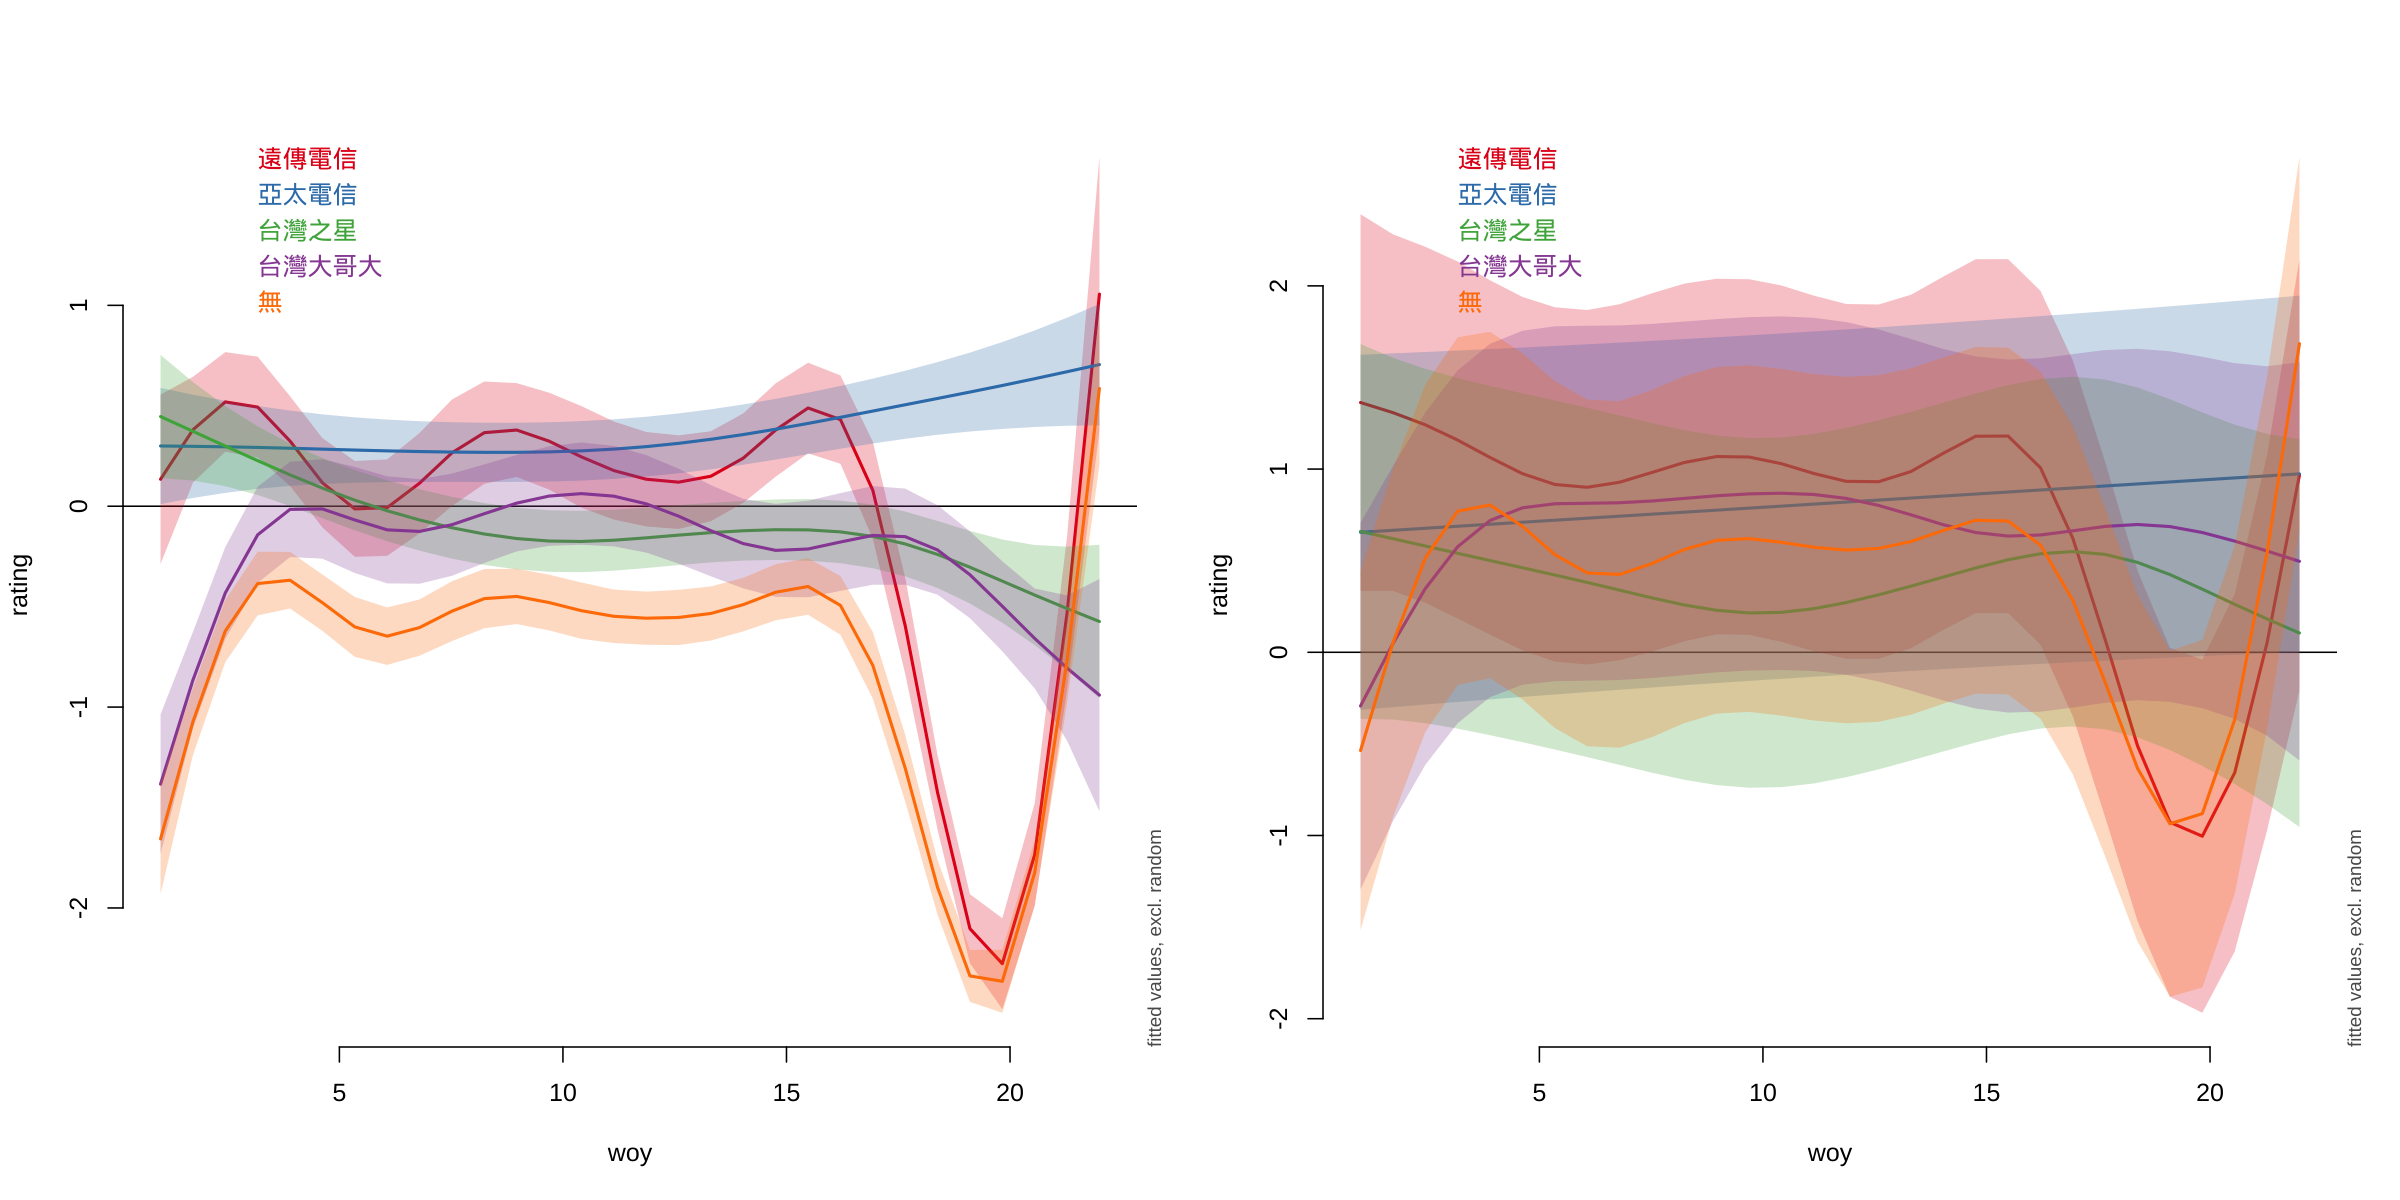

In [29]:
popt(16, 8, 150)
par(mfrow=c(1, 2))
plot_smooth(m2, view="woy", plot_all="entity", 
            col=brewer.pal(8, "Set1"), lwd=2, legend_plot_all="topleft")
plot_smooth(m3, view="woy", plot_all="entity", 
            col=brewer.pal(8, "Set1"), lwd=2, legend_plot_all="topleft")

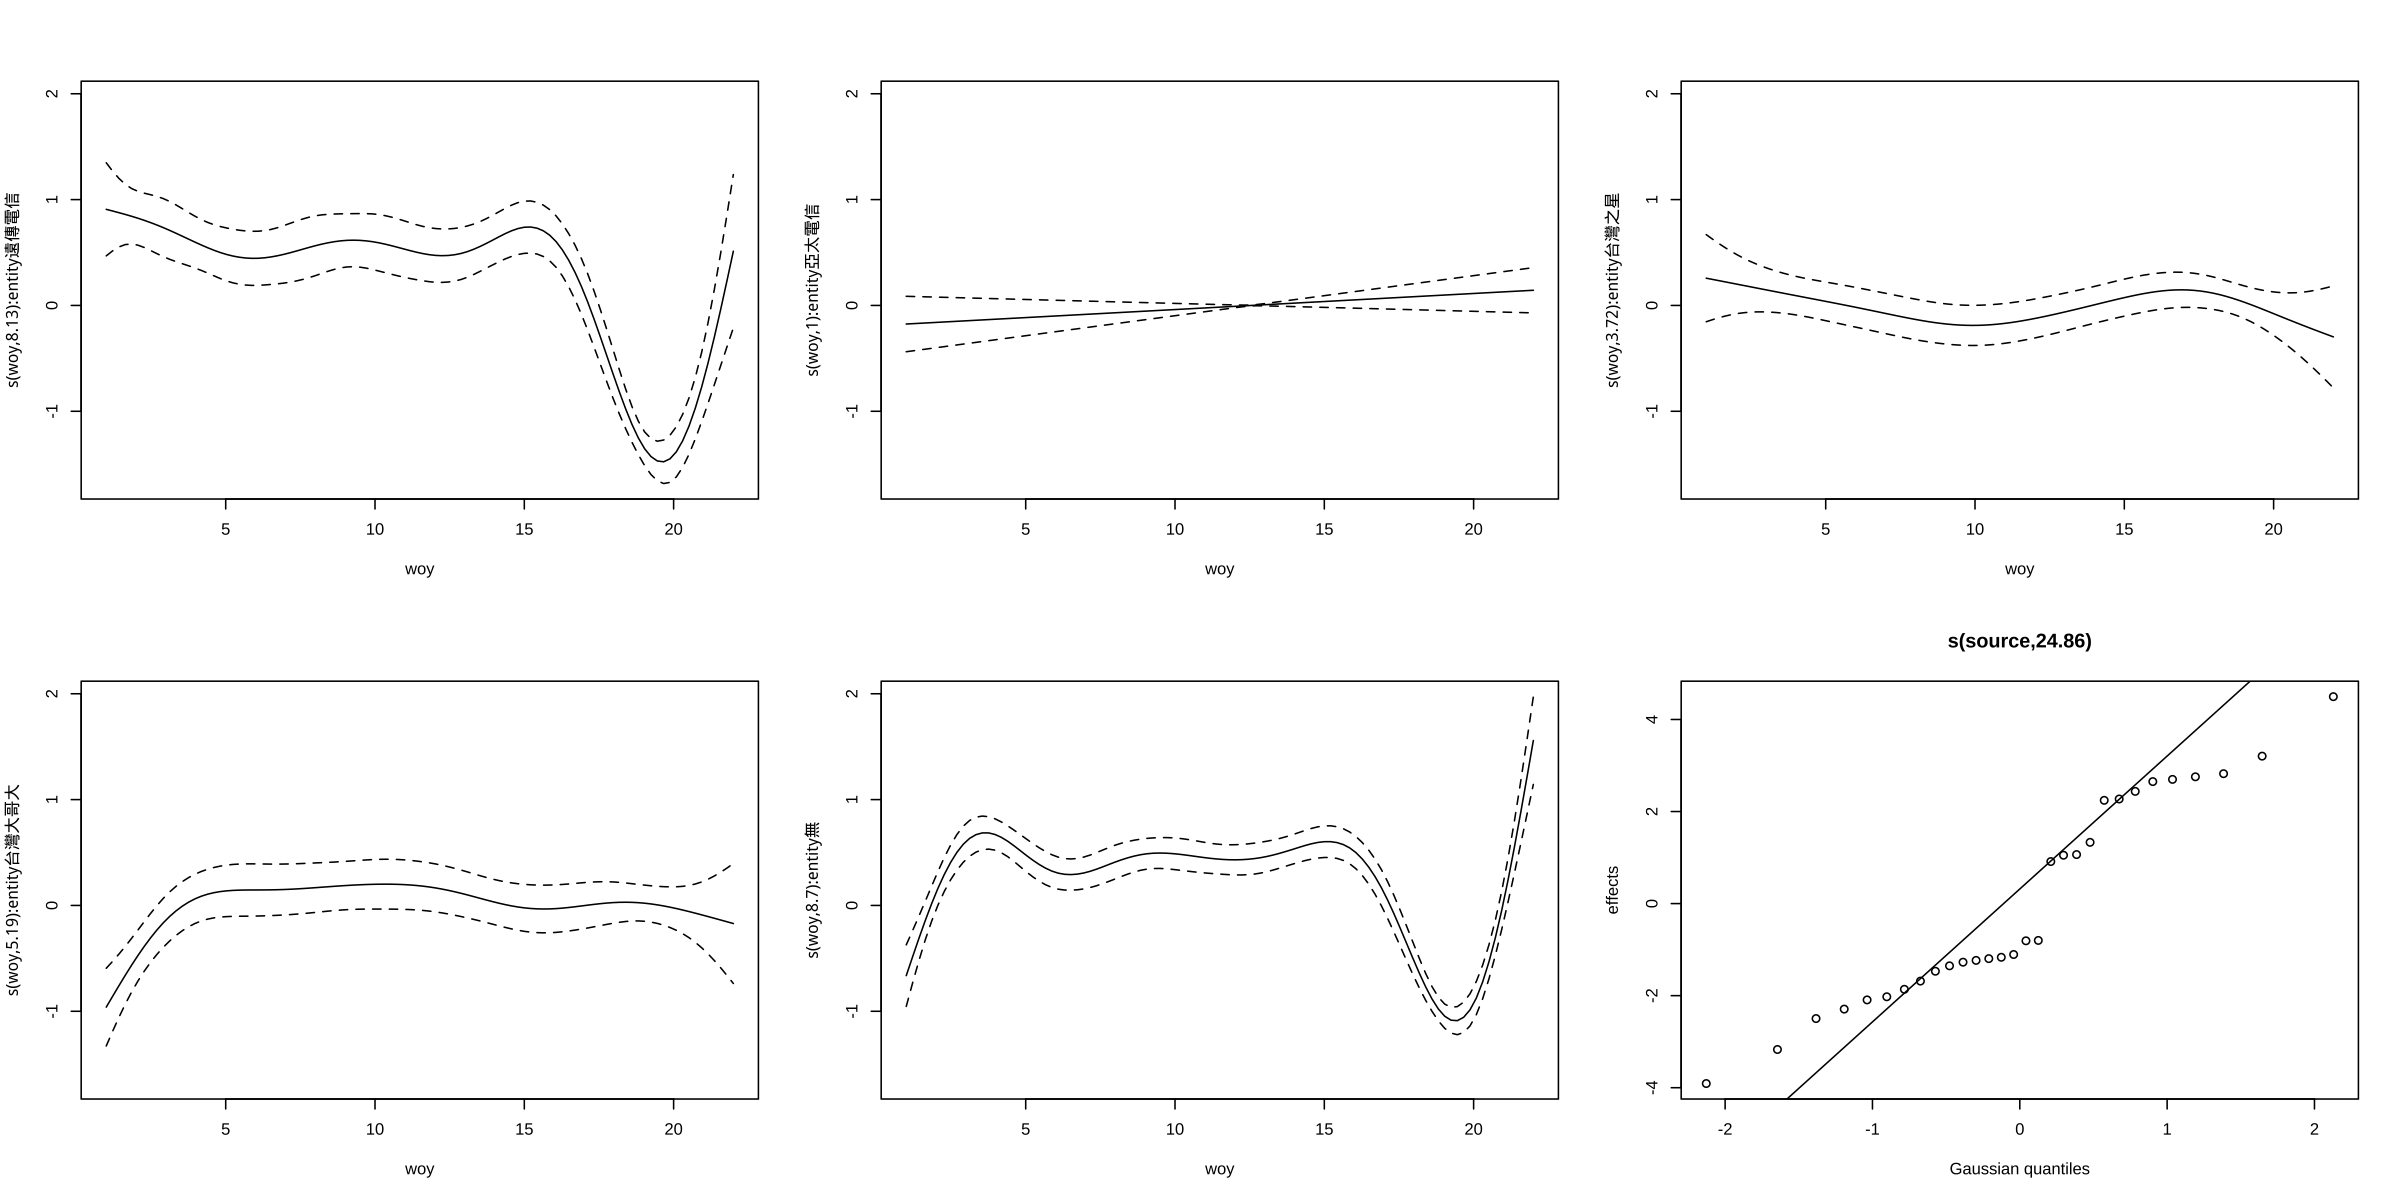

In [44]:
plot(m3, page=1)

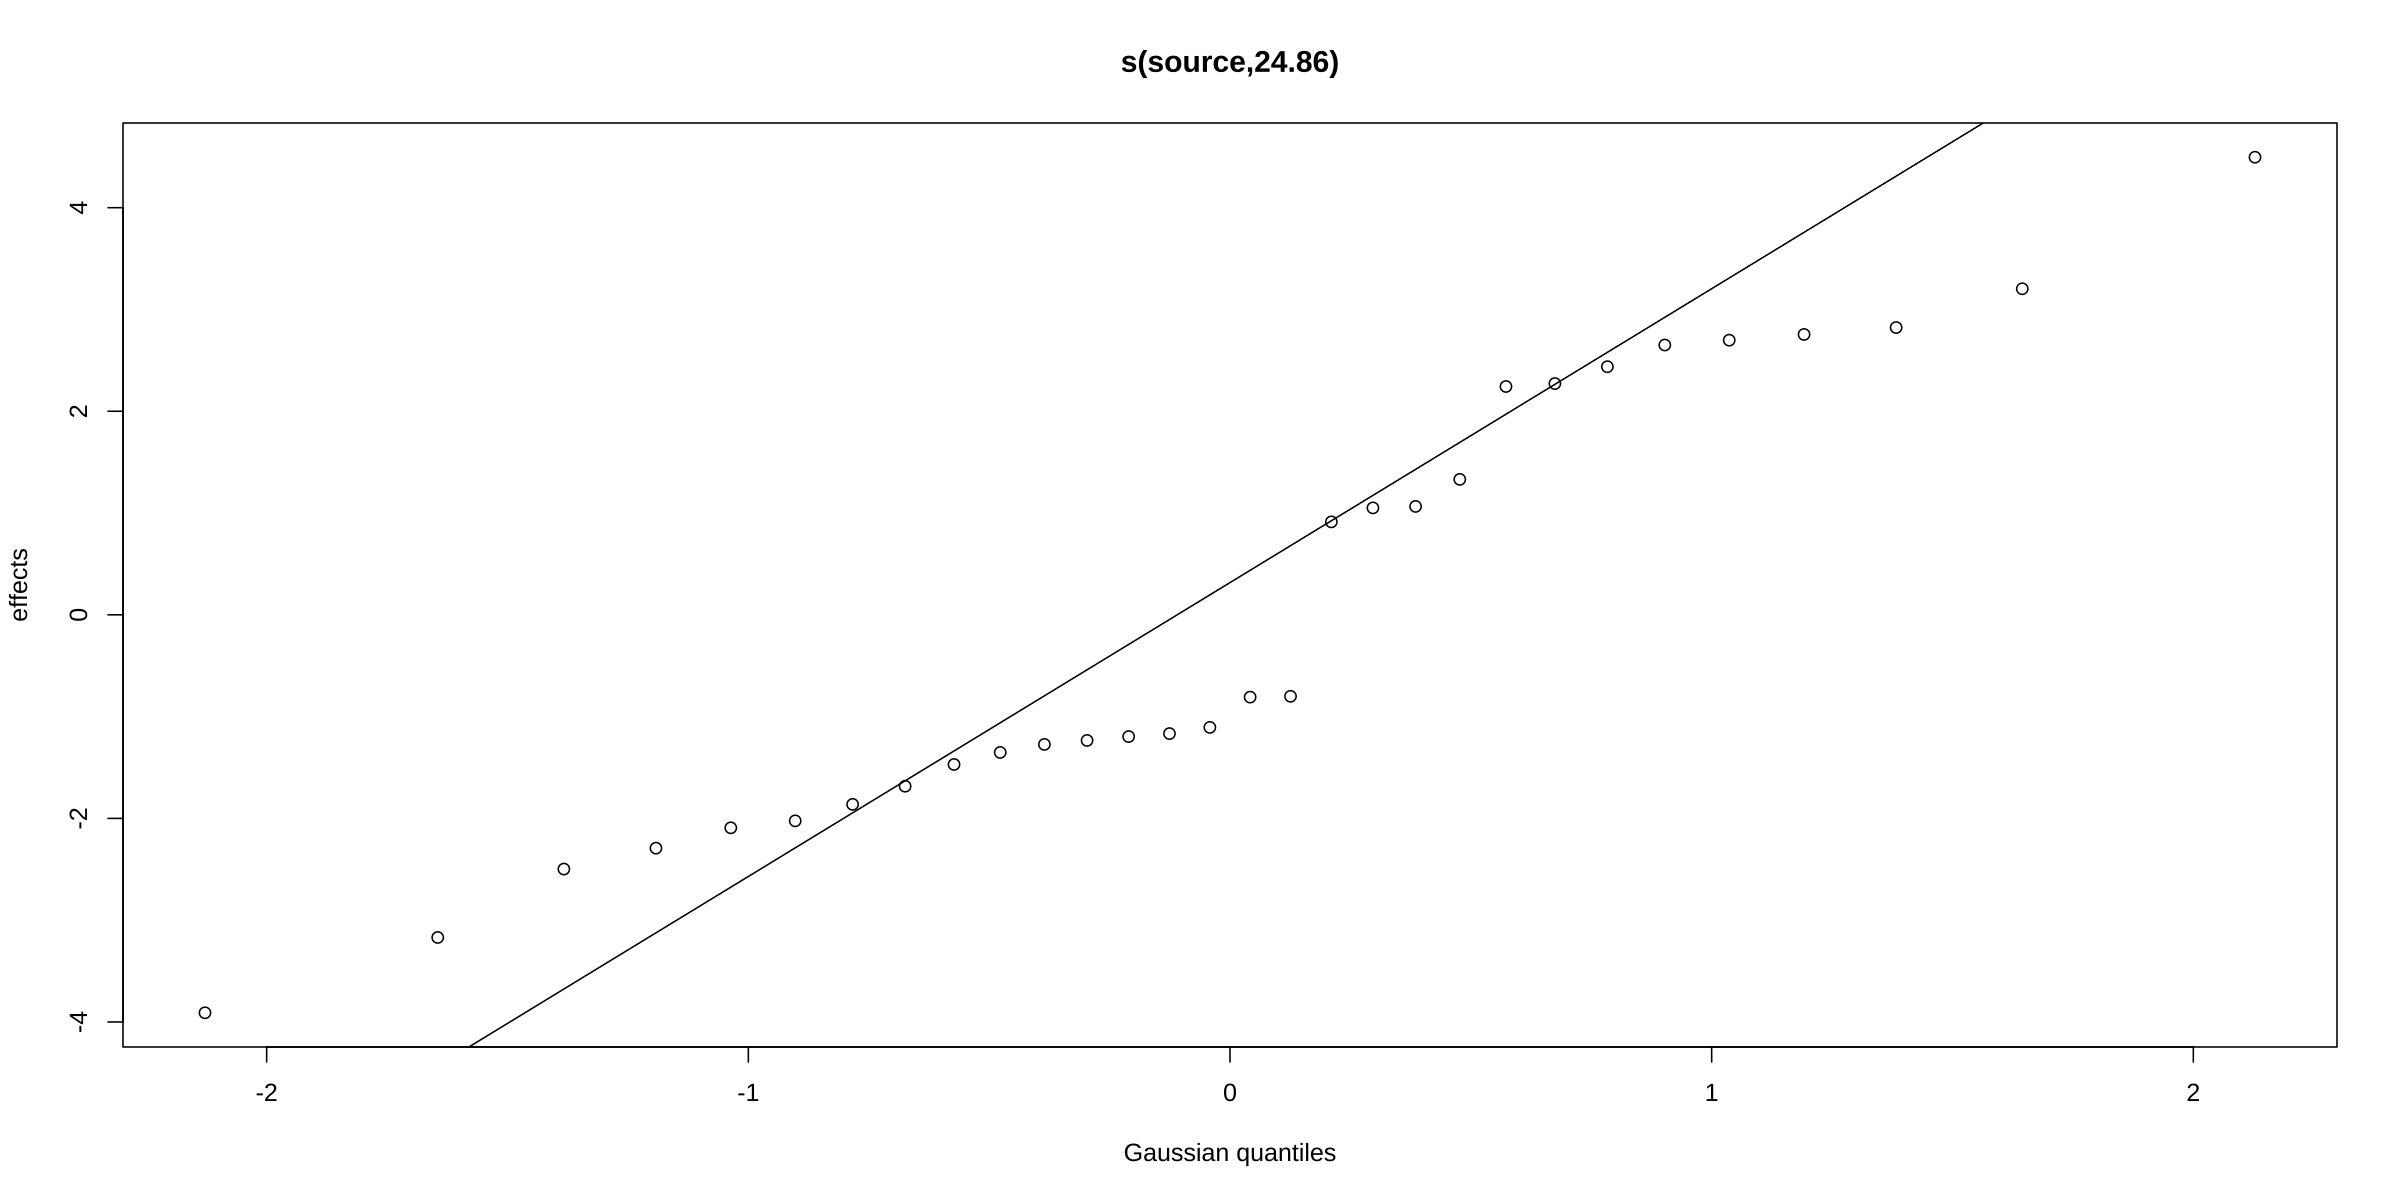

In [42]:
plot(m3, select=6)

Summary:
	* entity : factor; set to the value(s): 台灣大哥大. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* source : factor with 30 values; set to the value(s): 2home 打造桃花源, Android-台灣中文網, BabyHome 寶貝家庭親子網, Dcard, FashionGuide, GNN 新聞網, Google Play App 評價, Line Today, Luckydog, Meteor, ... 


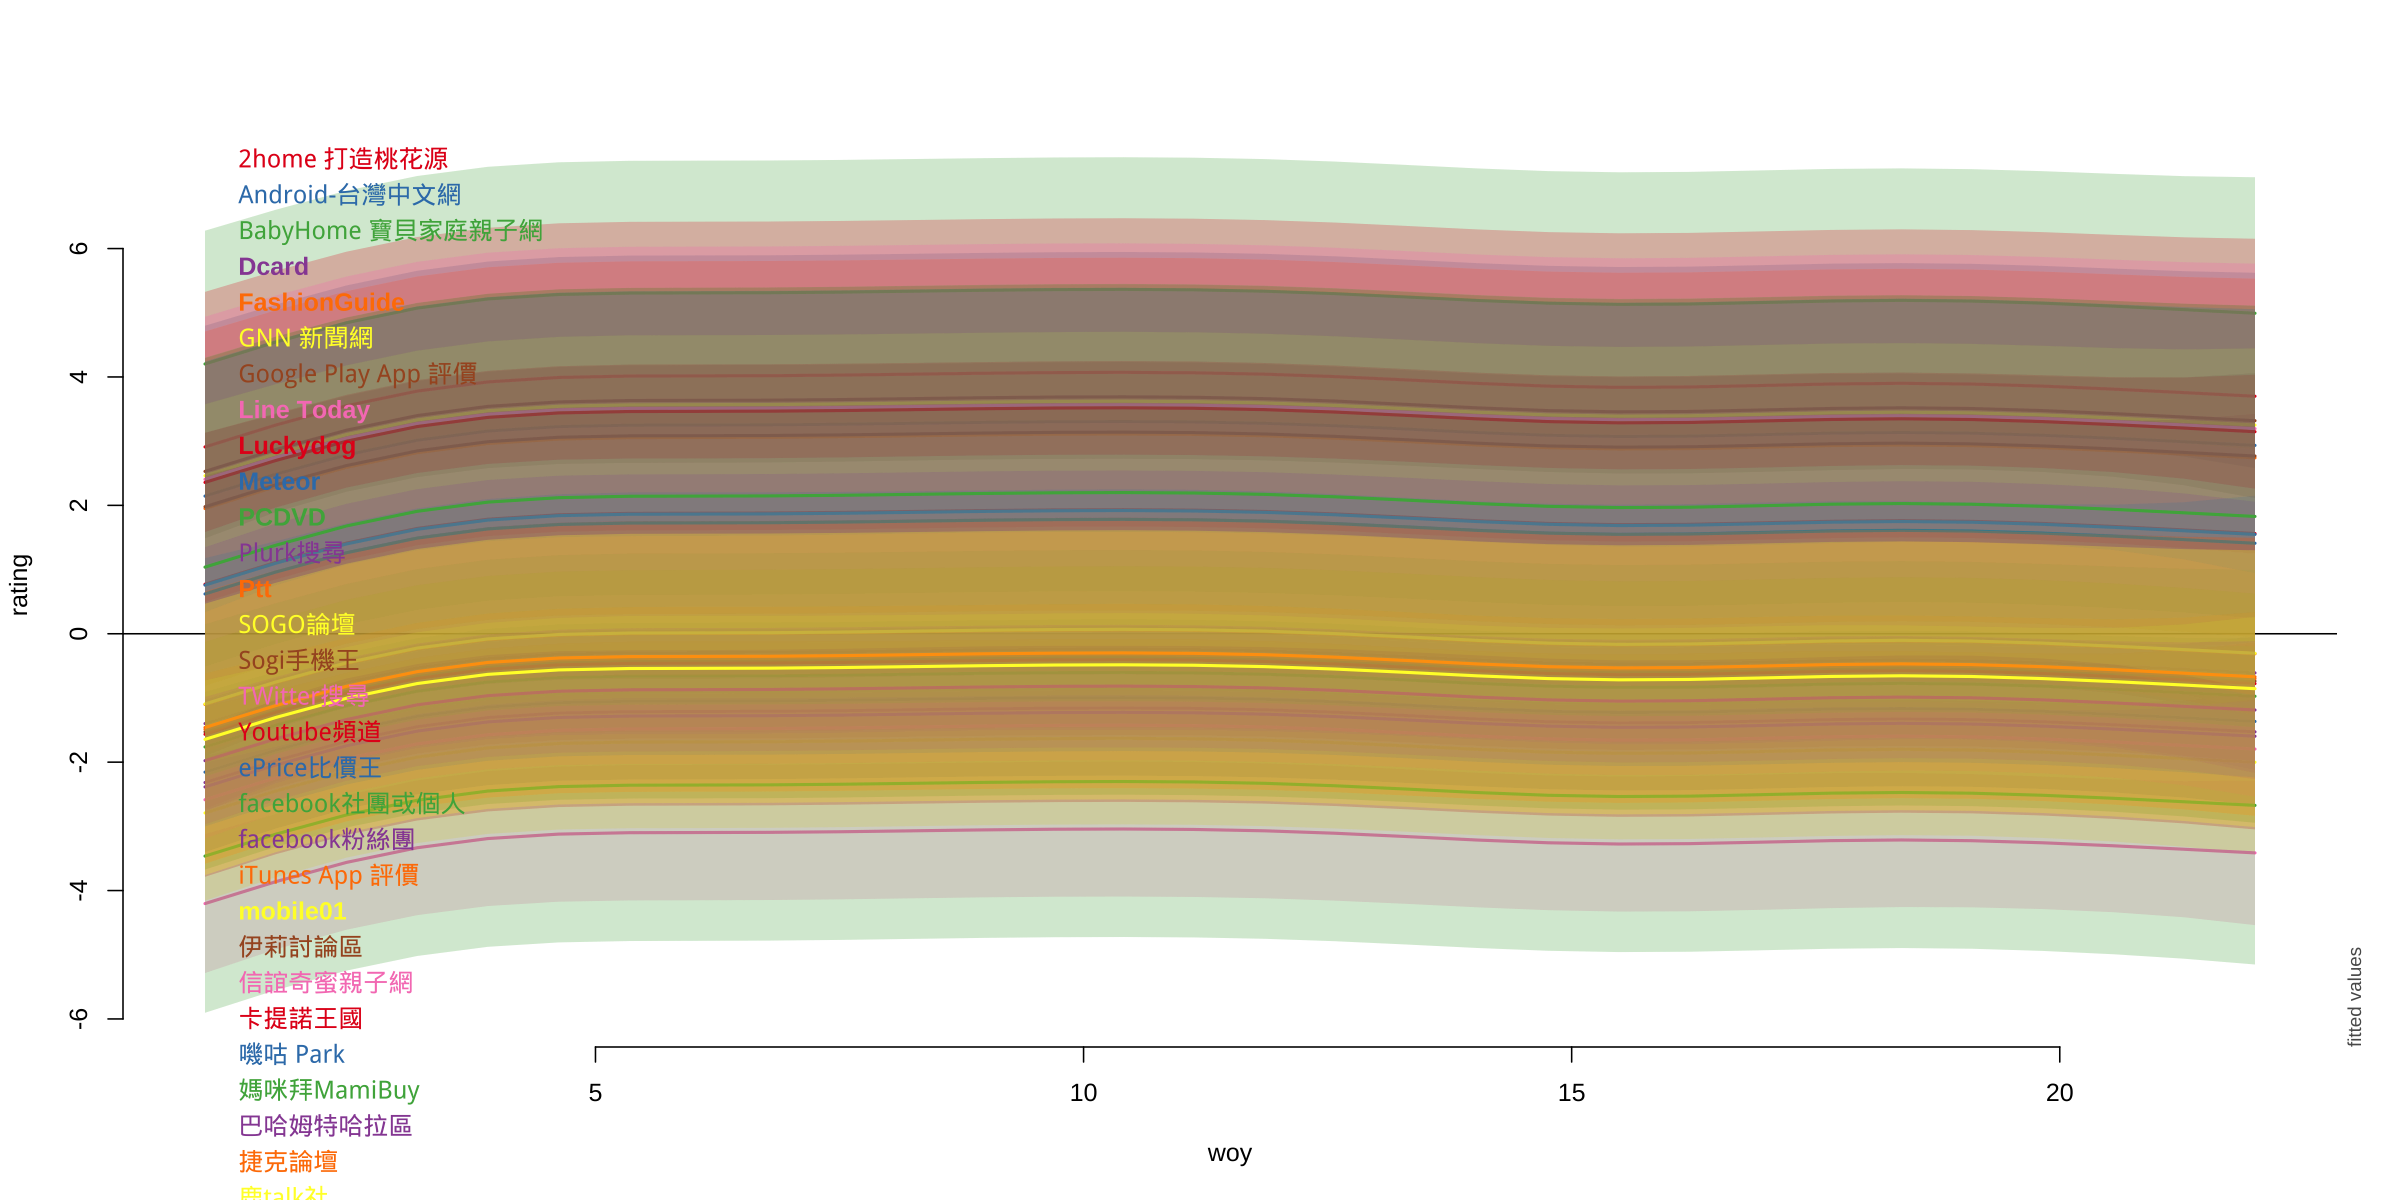

In [45]:
plot_smooth(m3, view="woy", plot_all="source", cond=list(entity="台灣大哥大"), 
            col=brewer.pal(8, "Set1"), lwd=2, legend_plot_all="topleft", rm.ranef=F)

In [38]:
get_modelterm(m3, select=6)

Summary:
	* source : factor with 30 values; set to the value(s): 2home 打造桃花源, Android-台灣中文網, BabyHome 寶貝家庭親子網, Dcard, FashionGuide, GNN 新聞網, Google Play App 評價, Line Today, Luckydog, Meteor, ... 


source                  fit        se.fit   
1  2home 打造桃花源         1.0650325 3.4926732
2  Android-台灣中文網       2.4377442 2.6939646
3  BabyHome 寶貝家庭親子網  4.4957634 2.1742284
4  Dcard                   -1.1059442 0.9388655
5  FashionGuide             2.2433115 2.7892776
6  GNN 新聞網              -2.4977268 1.5722054
7  Google Play App 評價    -1.2340169 0.9397280
8  Line Today              -3.9096137 1.3550486
9  Luckydog                 3.2033402 2.4771930
10 Meteor                  -1.8621815 1.4762547
11 PCDVD                   -1.4699668 2.0414601
12 Plurk搜尋               -2.0241706 0.9538148
13 Ptt                     -1.1958373 0.9369943
14 SOGO論壇                 2.7546132 1.3759162
15 Sogi手機王               2.8223446 1.0413320
16 TWitter搜尋             -2.2923439 1.0452690
17 Youtube頻道             -1.2731394 2.3112055
18 ePrice比價王             1.0507650 0.9578693
19 facebook社團或個人      -3.1698061 2.4997359
20 facebook粉絲團          -2.0925918 0.9401995
21 iTunes App 評價         -0.8084547 0.9841395
22 mobile01                -0.8003089 0.9365344
23 伊莉討論區               2.2723228 0.9871160
24 信誼奇蜜親子網           2.6983760 2.5836775
25 卡提諾王國               2.6506992 1.1426760
26 嘰咕 Park                0.9132845 3.5860995
27 媽咪拜MamiBuy            1.3309506 3.2515564
28 巴哈姆特哈拉區          -1.6838423 1.2871400
29 捷克論壇                -1.1666116 2.2147648
30 鹿talk社                -1.3519913 2.2067138


Method: fREML   Optimizer: perf newton
full convergence after 8 iterations.
Gradient range [-0.0002077186,1.651252e-07]
(score 24983.12 & scale 1).
Hessian positive definite, eigenvalue range [0.0002075993,10.35367].
Model rank =  80 / 80 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                           k'   edf k-index p-value  
s(woy):entity遠傳電信    9.00  8.13    0.97   0.055 .
s(woy):entity亞太電信    9.00  1.00    0.97   0.090 .
s(woy):entity台灣之星    9.00  3.72    0.97   0.080 .
s(woy):entity台灣大哥大  9.00  5.19    0.97   0.060 .
s(woy):entity無          9.00  8.70    0.97   0.075 .
s(source)               30.00 24.86      NA      NA  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


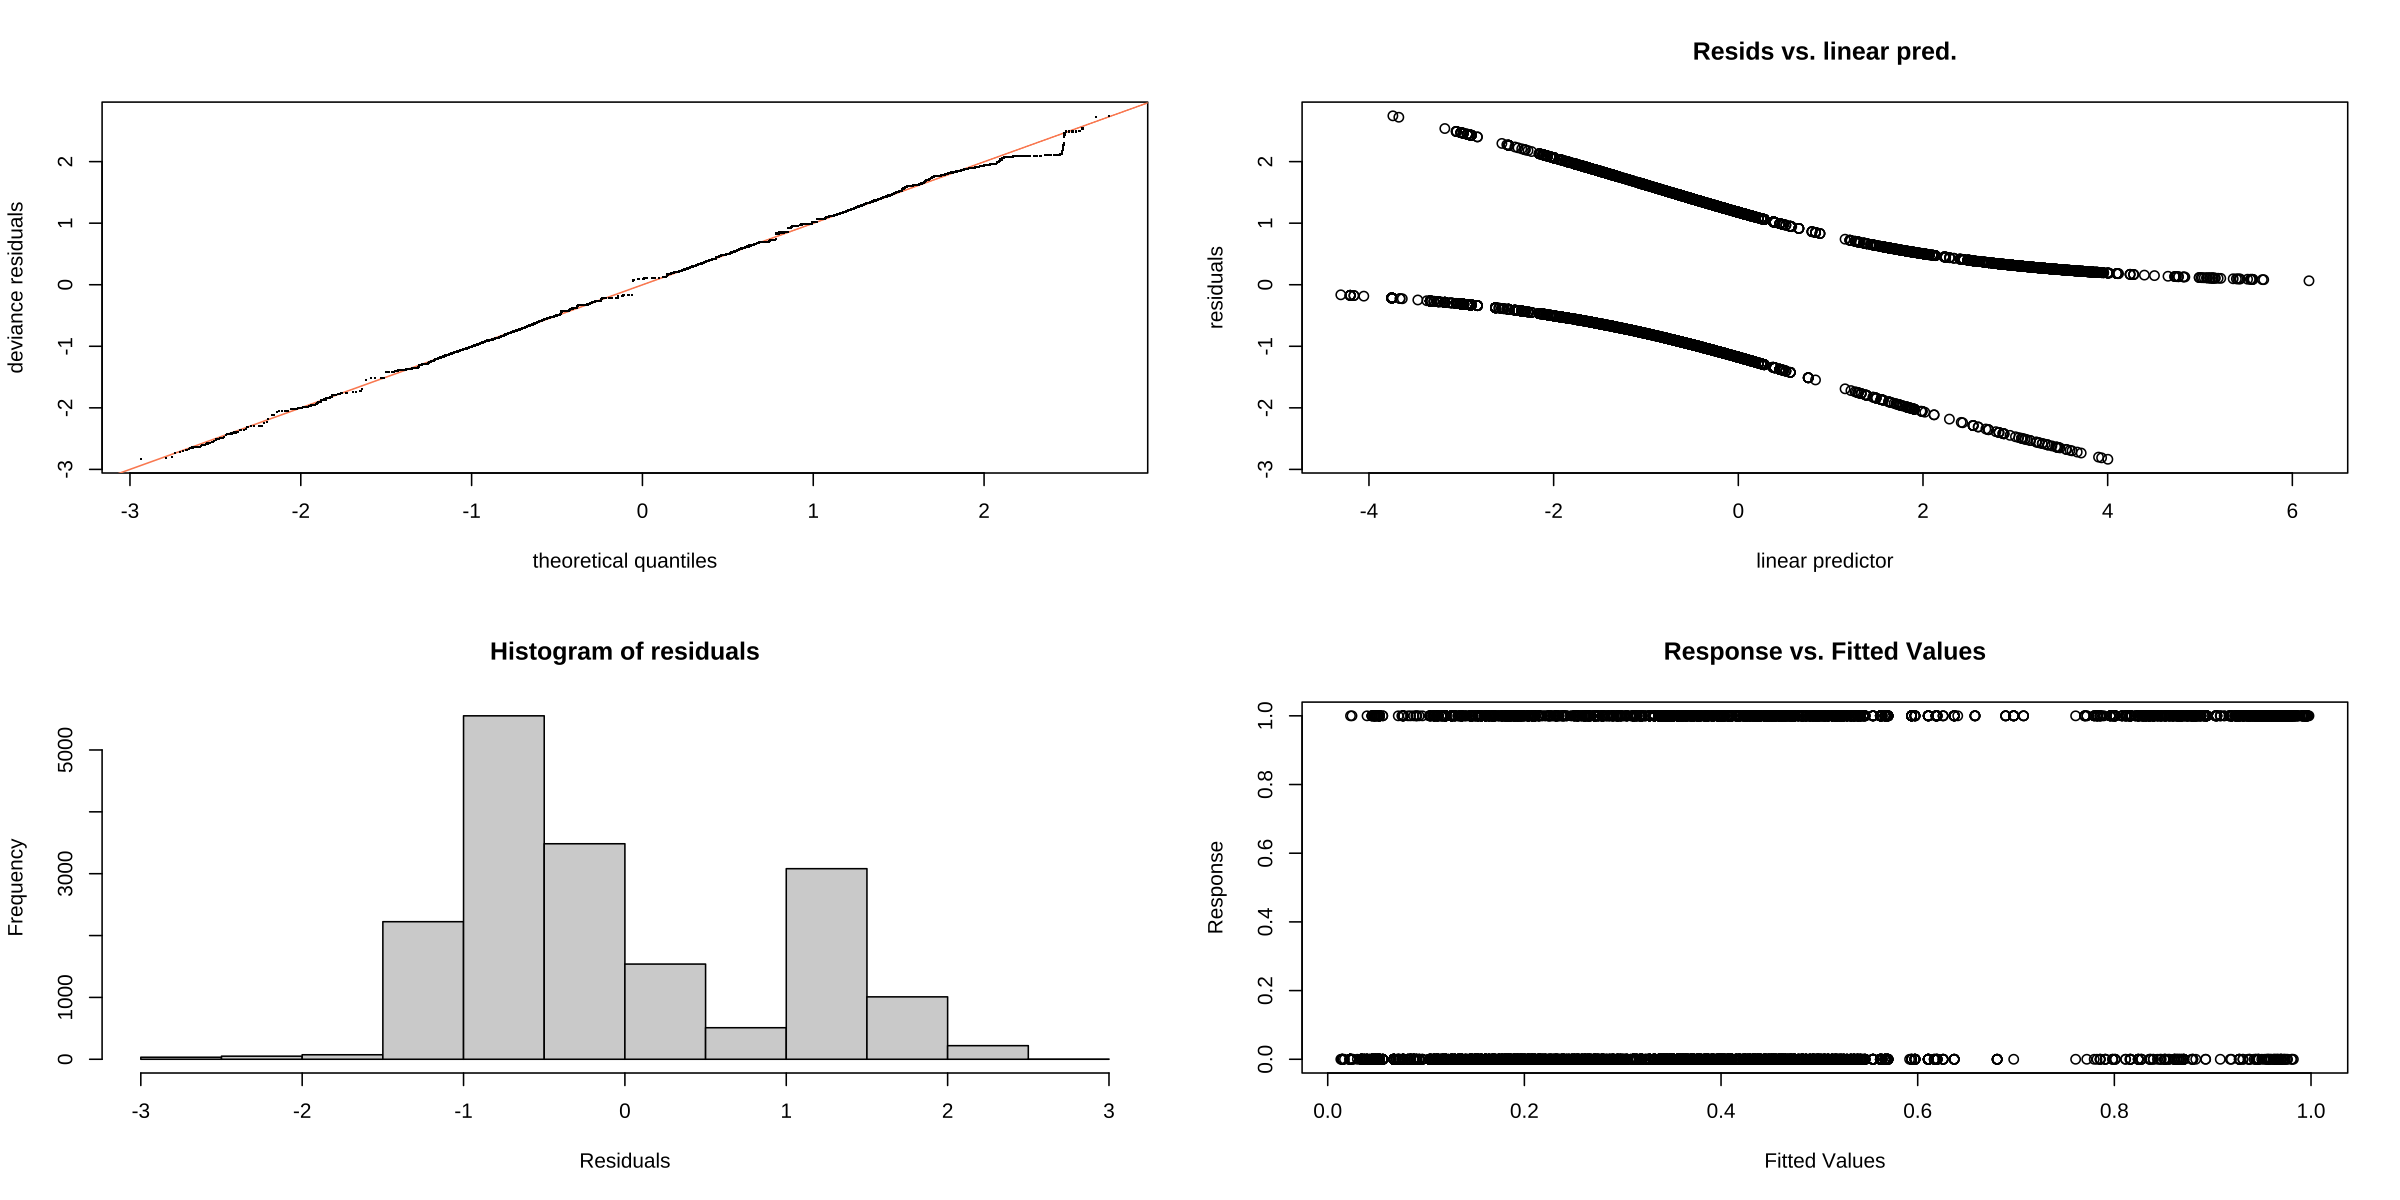

In [30]:
gam.check(m3)

In [24]:
unique(m3_data$source)

[1] Dcard                   ePrice比價王            facebook粉絲團         
 [4] Google Play App 評價    iTunes App 評價         mobile01               
 [7] Ptt                     Plurk搜尋               SOGO論壇               
[10] 伊莉討論區              GNN 新聞網              Line Today             
[13] PCDVD                   Sogi手機王              TWitter搜尋            
[16] 卡提諾王國              Youtube頻道             Android-台灣中文網     
[19] BabyHome 寶貝家庭親子網 巴哈姆特哈拉區          Meteor                 
[22] FashionGuide            媽咪拜MamiBuy           facebook社團或個人     
[25] 捷克論壇                鹿talk社                信誼奇蜜親子網         
[28] 2home 打造桃花源        嘰咕 Park               Luckydog               
30 Levels: 2home 打造桃花源 Android-台灣中文網 ... 鹿talk社

Summary:
	* entity : factor; set to the value(s): 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* source : factor; set to the value(s): facebook粉絲團. 
Summary:
	* entity : factor; set to the value(s): 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* source : factor; set to the value(s): Line Today. 


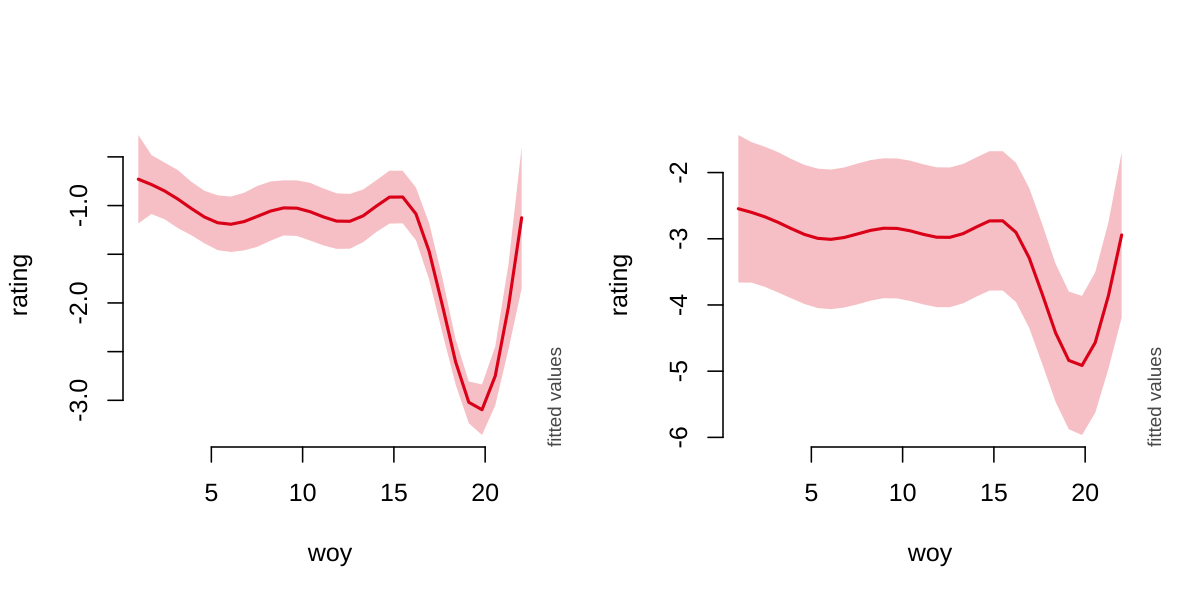

In [25]:
popt(8, 4, 150)
par(mfrow=c(1, 2))
plot_smooth(m3, view="woy",             
            cond=list(entity="遠傳電信", source="facebook粉絲團"),
            col=brewer.pal(8, "Set1"), lwd=2,             
            legend_plot_all="topleft", rm.ranef=F)
plot_smooth(m3, view="woy",             
            cond=list(entity="遠傳電信", source="Line Today"),
            col=brewer.pal(8, "Set1"), lwd=2,             
            legend_plot_all="topleft", rm.ranef=F)

Warning message in plot_smooth(m3, view = "woy", cond = list(entity = "遠傳電信", :
“source in cond and in plot_all. Not all levels are being plotted.”


Summary:
	* entity : factor; set to the value(s): 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* source : factor; set to the value(s): Line Today, facebook粉絲團. 


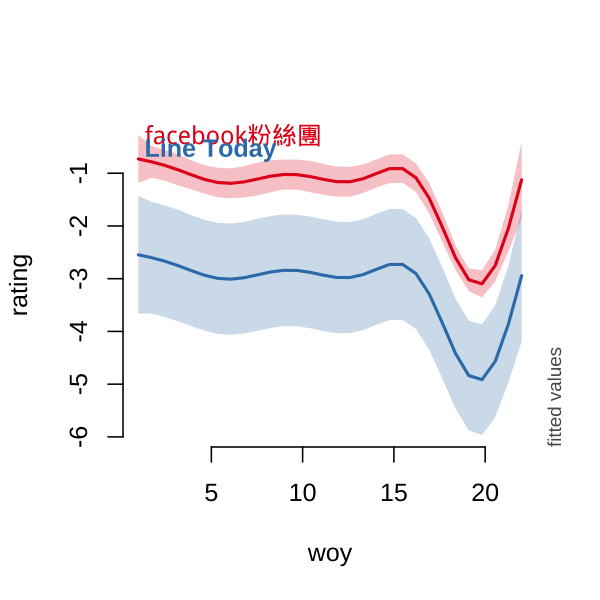

In [26]:
popt(4, 4, 150)
plot_smooth(m3, view="woy",             
            cond=list(entity="遠傳電信", source=c("facebook粉絲團", "Line Today")),
            plot_all="source",
            col=brewer.pal(8, "Set1"), lwd=2,             
            legend_plot_all="topleft", rm.ranef=F)

In [39]:
m4 = bam(rating~entity+s(woy, by=entity)+s(woy, source, bs="fs", m=1), 
         data = m3_data, family="binomial")

In [40]:
summary(m4)


Family: binomial 
Link function: logit 

Formula:
rating ~ entity + s(woy, by = entity) + s(woy, source, bs = "fs", 
    m = 1)

Parametric coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.46843    0.47541   0.985  0.32447    
entity亞太電信    0.29475    0.08519   3.460  0.00054 ***
entity台灣之星   -0.12602    0.07254  -1.737  0.08233 .  
entity台灣大哥大  0.16067    0.07245   2.218  0.02658 *  
entity無         -0.33943    0.05672  -5.984 2.18e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                           edf  Ref.df   Chi.sq  p-value    
s(woy):entity遠傳電信    6.958   7.958   64.823  < 2e-16 ***
s(woy):entity亞太電信    1.000   1.000    0.026    0.871    
s(woy):entity台灣之星    1.000   1.001    0.339    0.560    
s(woy):entity台灣大哥大  6.590   7.651   33.066 4.41e-05 ***
s(woy):entity無          8.244   8.751  114.430  < 2e-16 ***
s(woy,source)           86.510 188.000 1935.742  < 2e

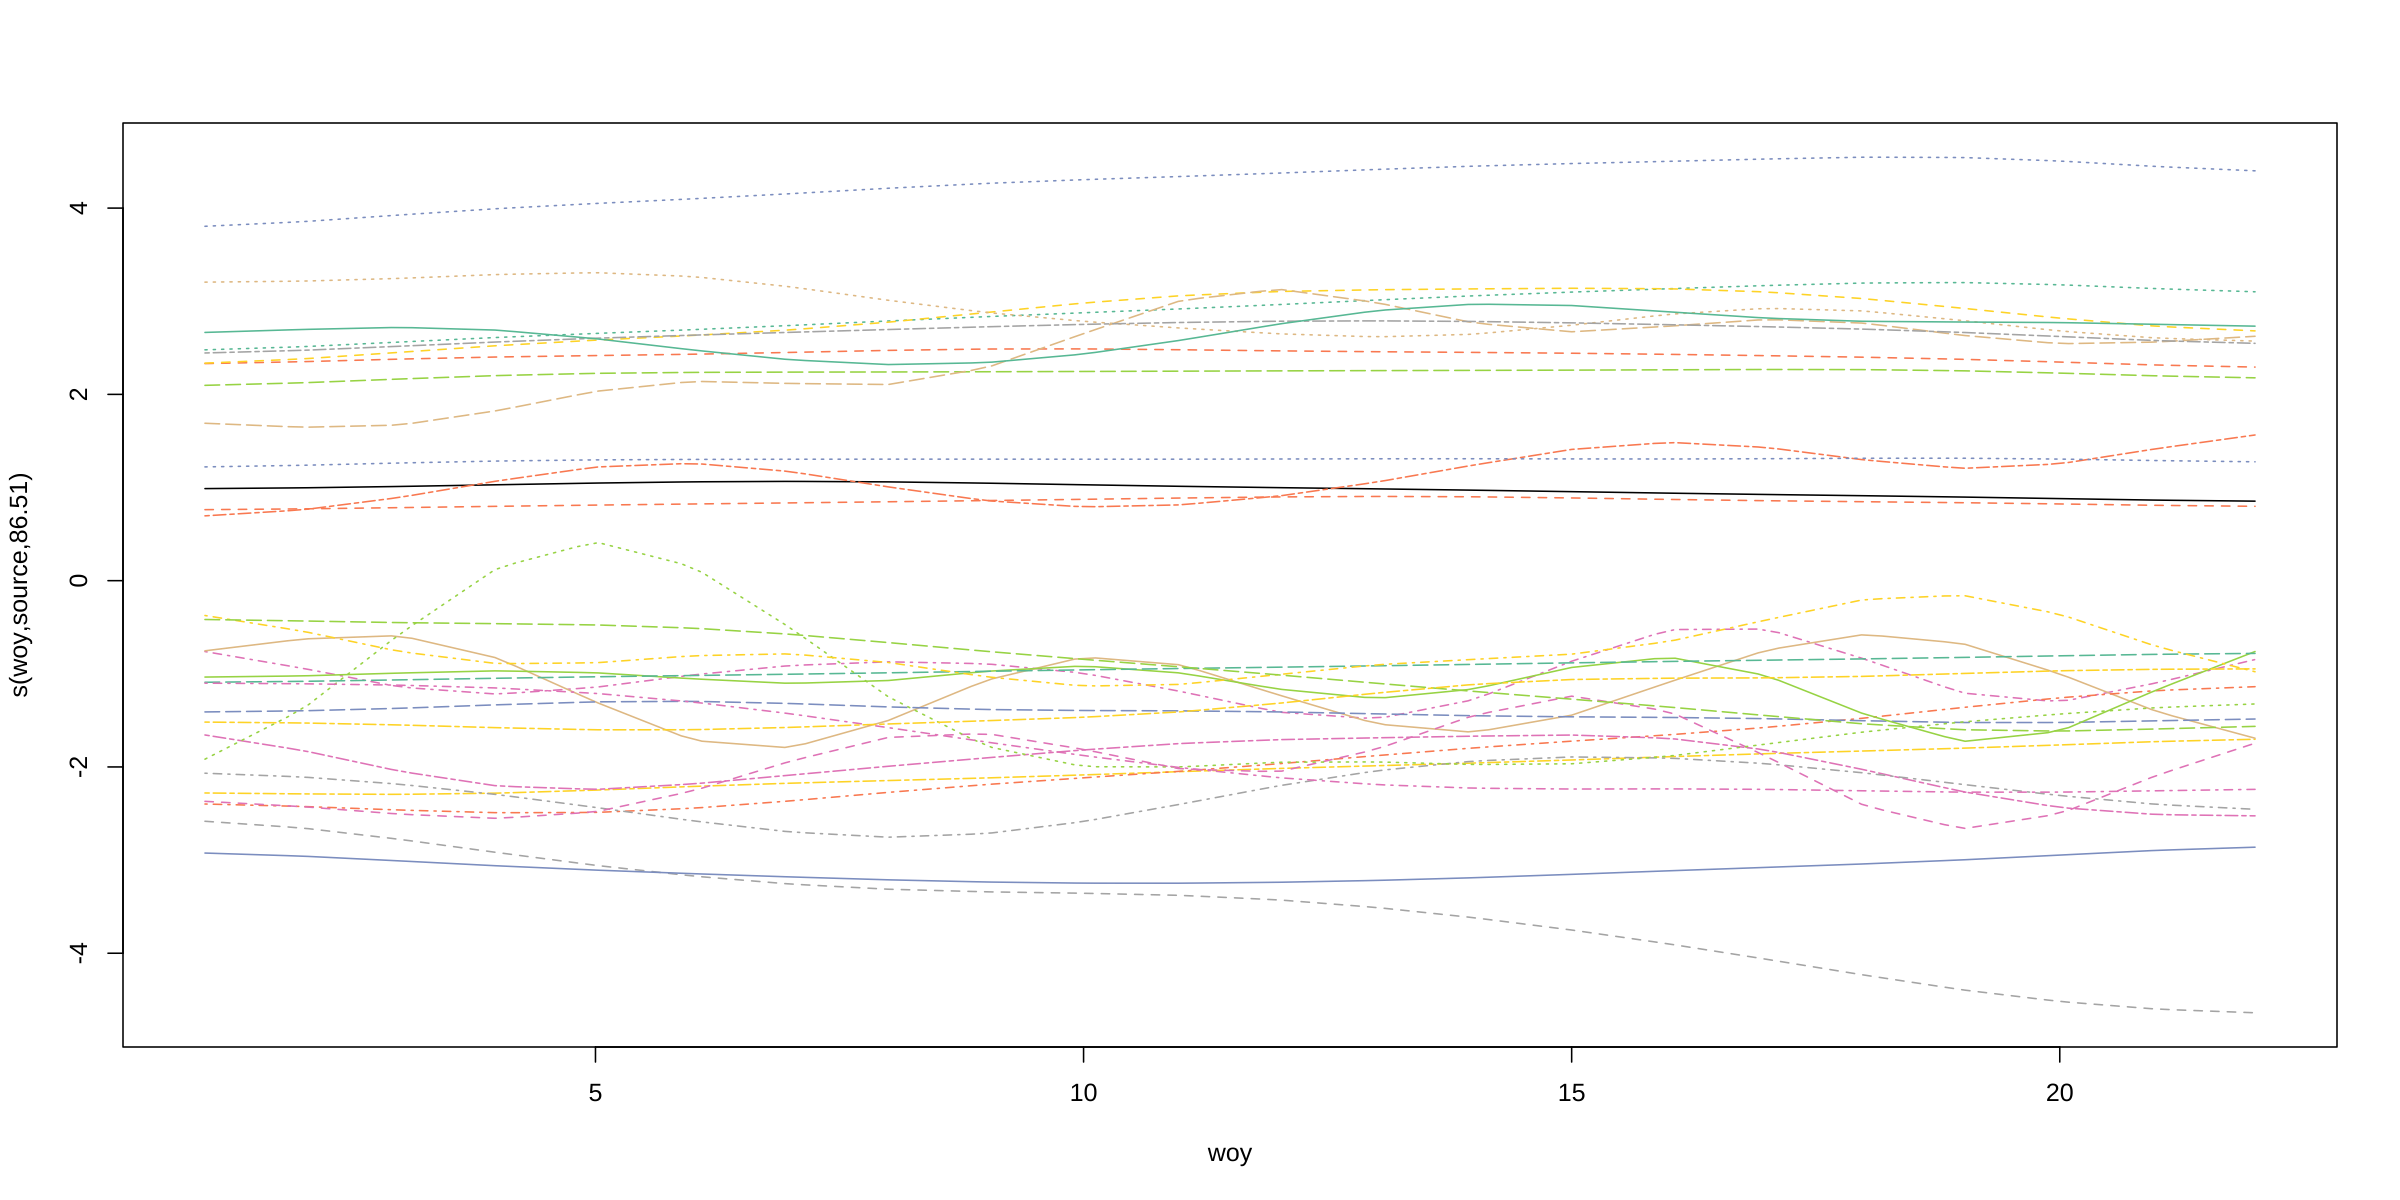

In [41]:
plot(m4, select=6)

Warning message in plot_smooth(m4, view = "woy", plot_all = "entity", cond = list(entity = c("遠傳電信", :
“entity in cond and in plot_all. Not all levels are being plotted.”


Summary:
	* entity : factor; set to the value(s): 台灣大哥大, 遠傳電信. 
	* woy : numeric predictor; with 30 values ranging from 1.000000 to 22.000000. 
	* source : factor; set to the value(s): Ptt. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(woy,source)
 


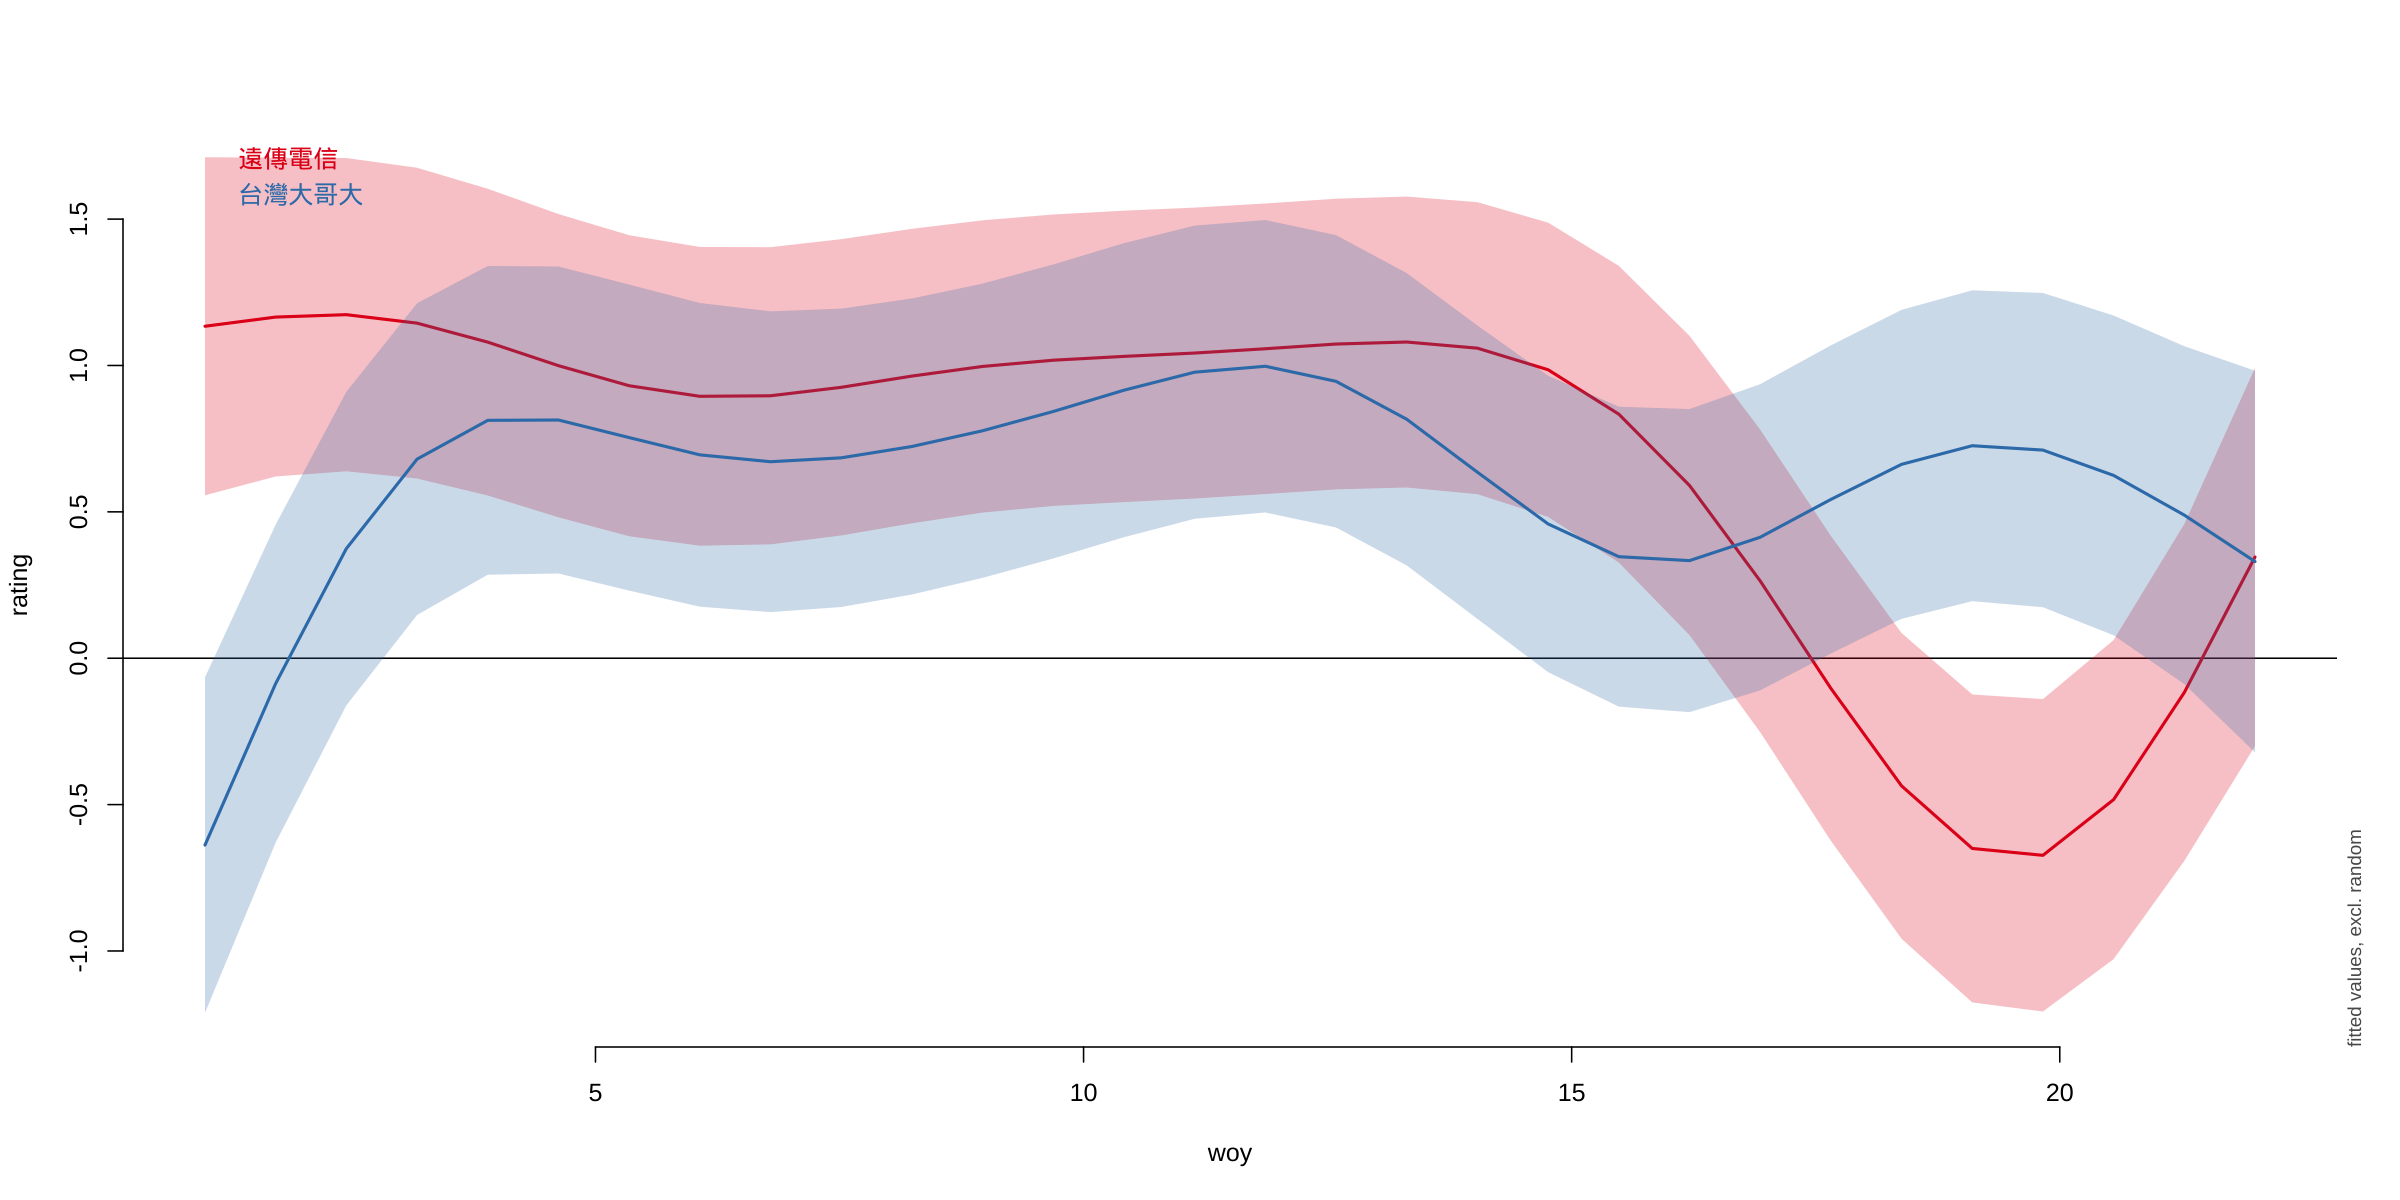

In [50]:
plot_smooth(m4, view="woy", plot_all="entity", cond=list(entity=c("遠傳電信", "台灣大哥大")), se=1,  
            col=brewer.pal(8, "Set1"), lwd=2, legend_plot_all="topleft")

Summary:
	* woy : numeric predictor; with 100 values ranging from 1.000000 to 22.000000. 
	* source : factor; set to the value(s): Ptt. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(woy,source)
 

woy window(s) of significant difference(s):
	1.000000 - 3.333333
	13.727273 - 15.848485
	17.333333 - 21.151515


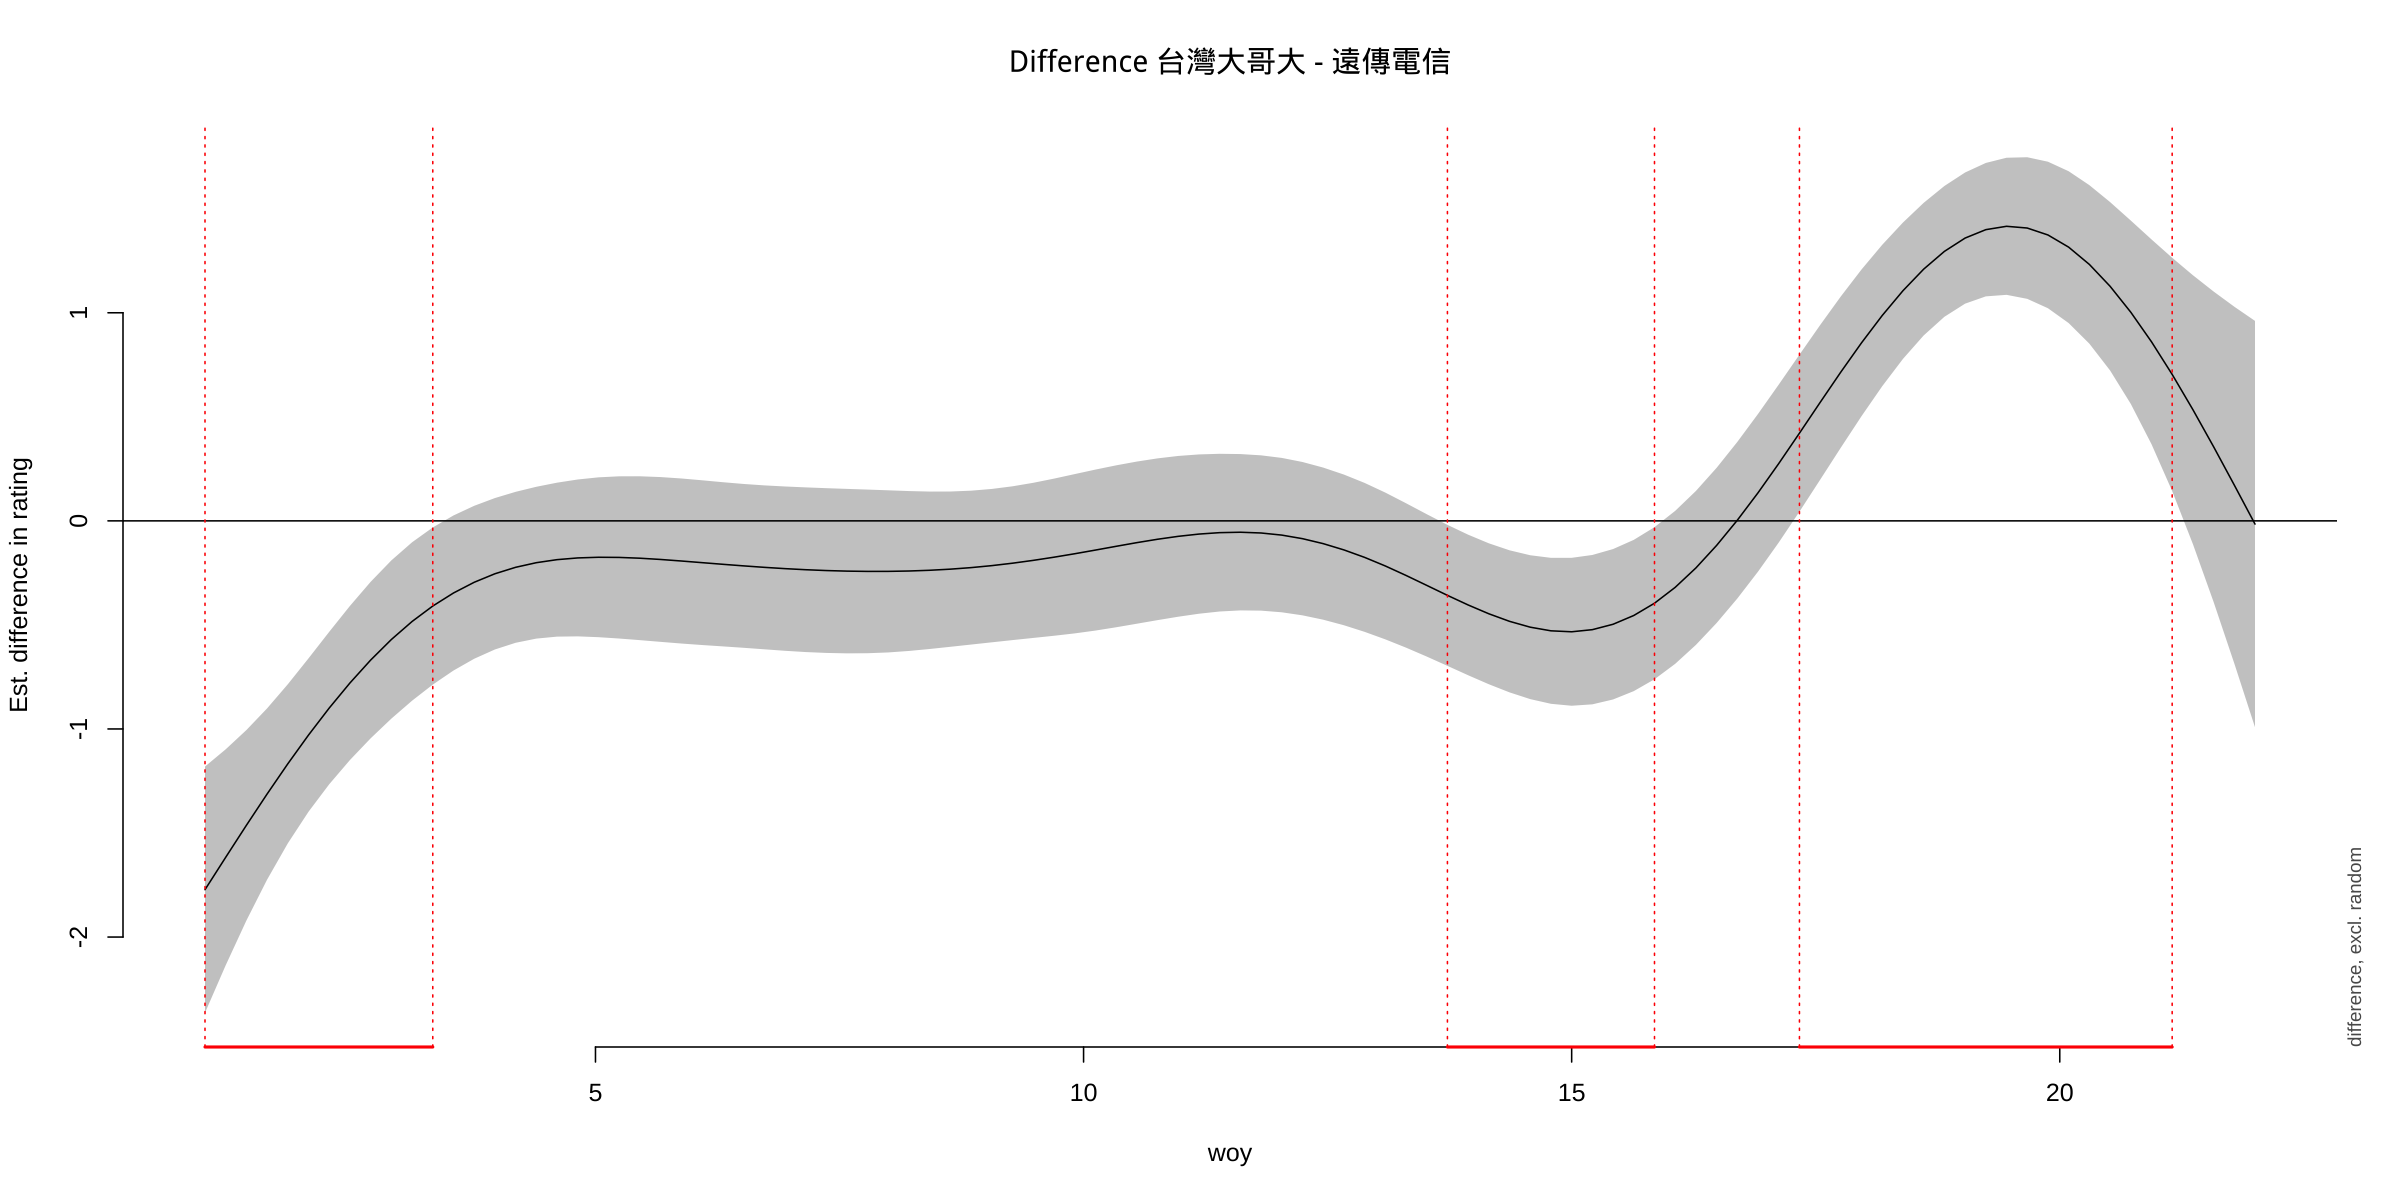

In [62]:
plot_diff(m4, view="woy", comp=list(entity=c("台灣大哥大", "遠傳電信")))

In [53]:
m3_data$entity_order = as.ordered(m3_data$entity)

In [54]:
levels(m3_data$entity_order)

[1] "遠傳電信"   "亞太電信"   "台灣之星"   "台灣大哥大" "無"

In [63]:
m5.x = bam(rating~s(woy)+s(woy, by=entity)+s(woy, source, bs="fs", m=1), 
         data = m3_data, family="binomial")

Warning message in gam.side(sm, X, tol = .Machine$double.eps^0.5):
“model has repeated 1-d smooths of same variable.”


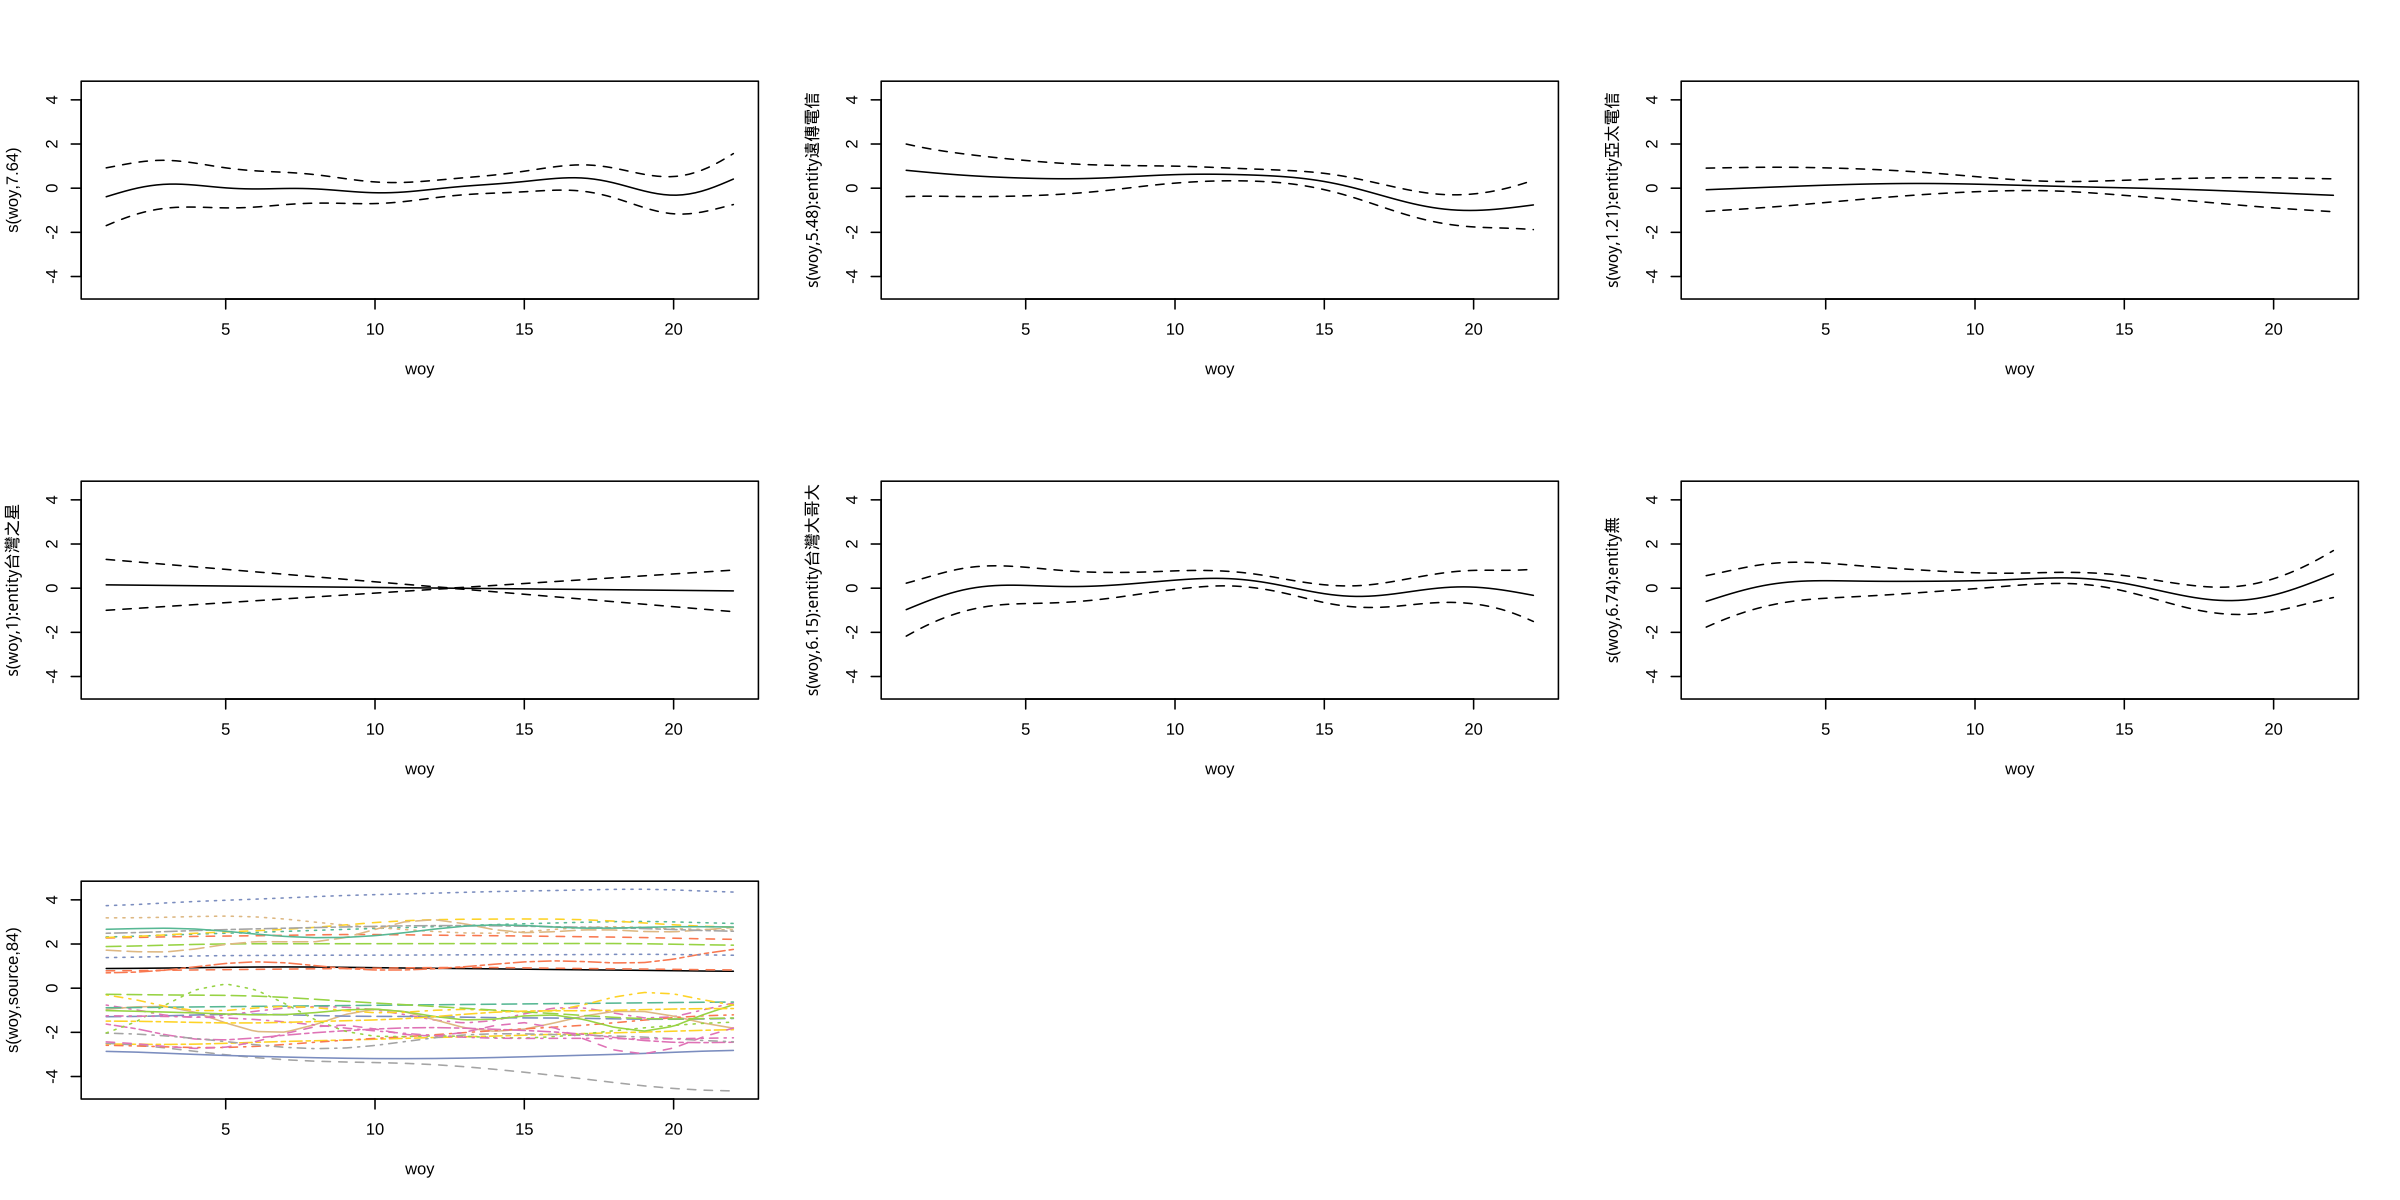

In [64]:
plot(m5.x, pages=1)

In [55]:
m5 = bam(rating~s(woy)+s(woy, by=entity_order)+s(woy, source, bs="fs", m=1), 
         data = m3_data, family="binomial")

Warning message in gam.side(sm, X, tol = .Machine$double.eps^0.5):
“model has repeated 1-d smooths of same variable.”


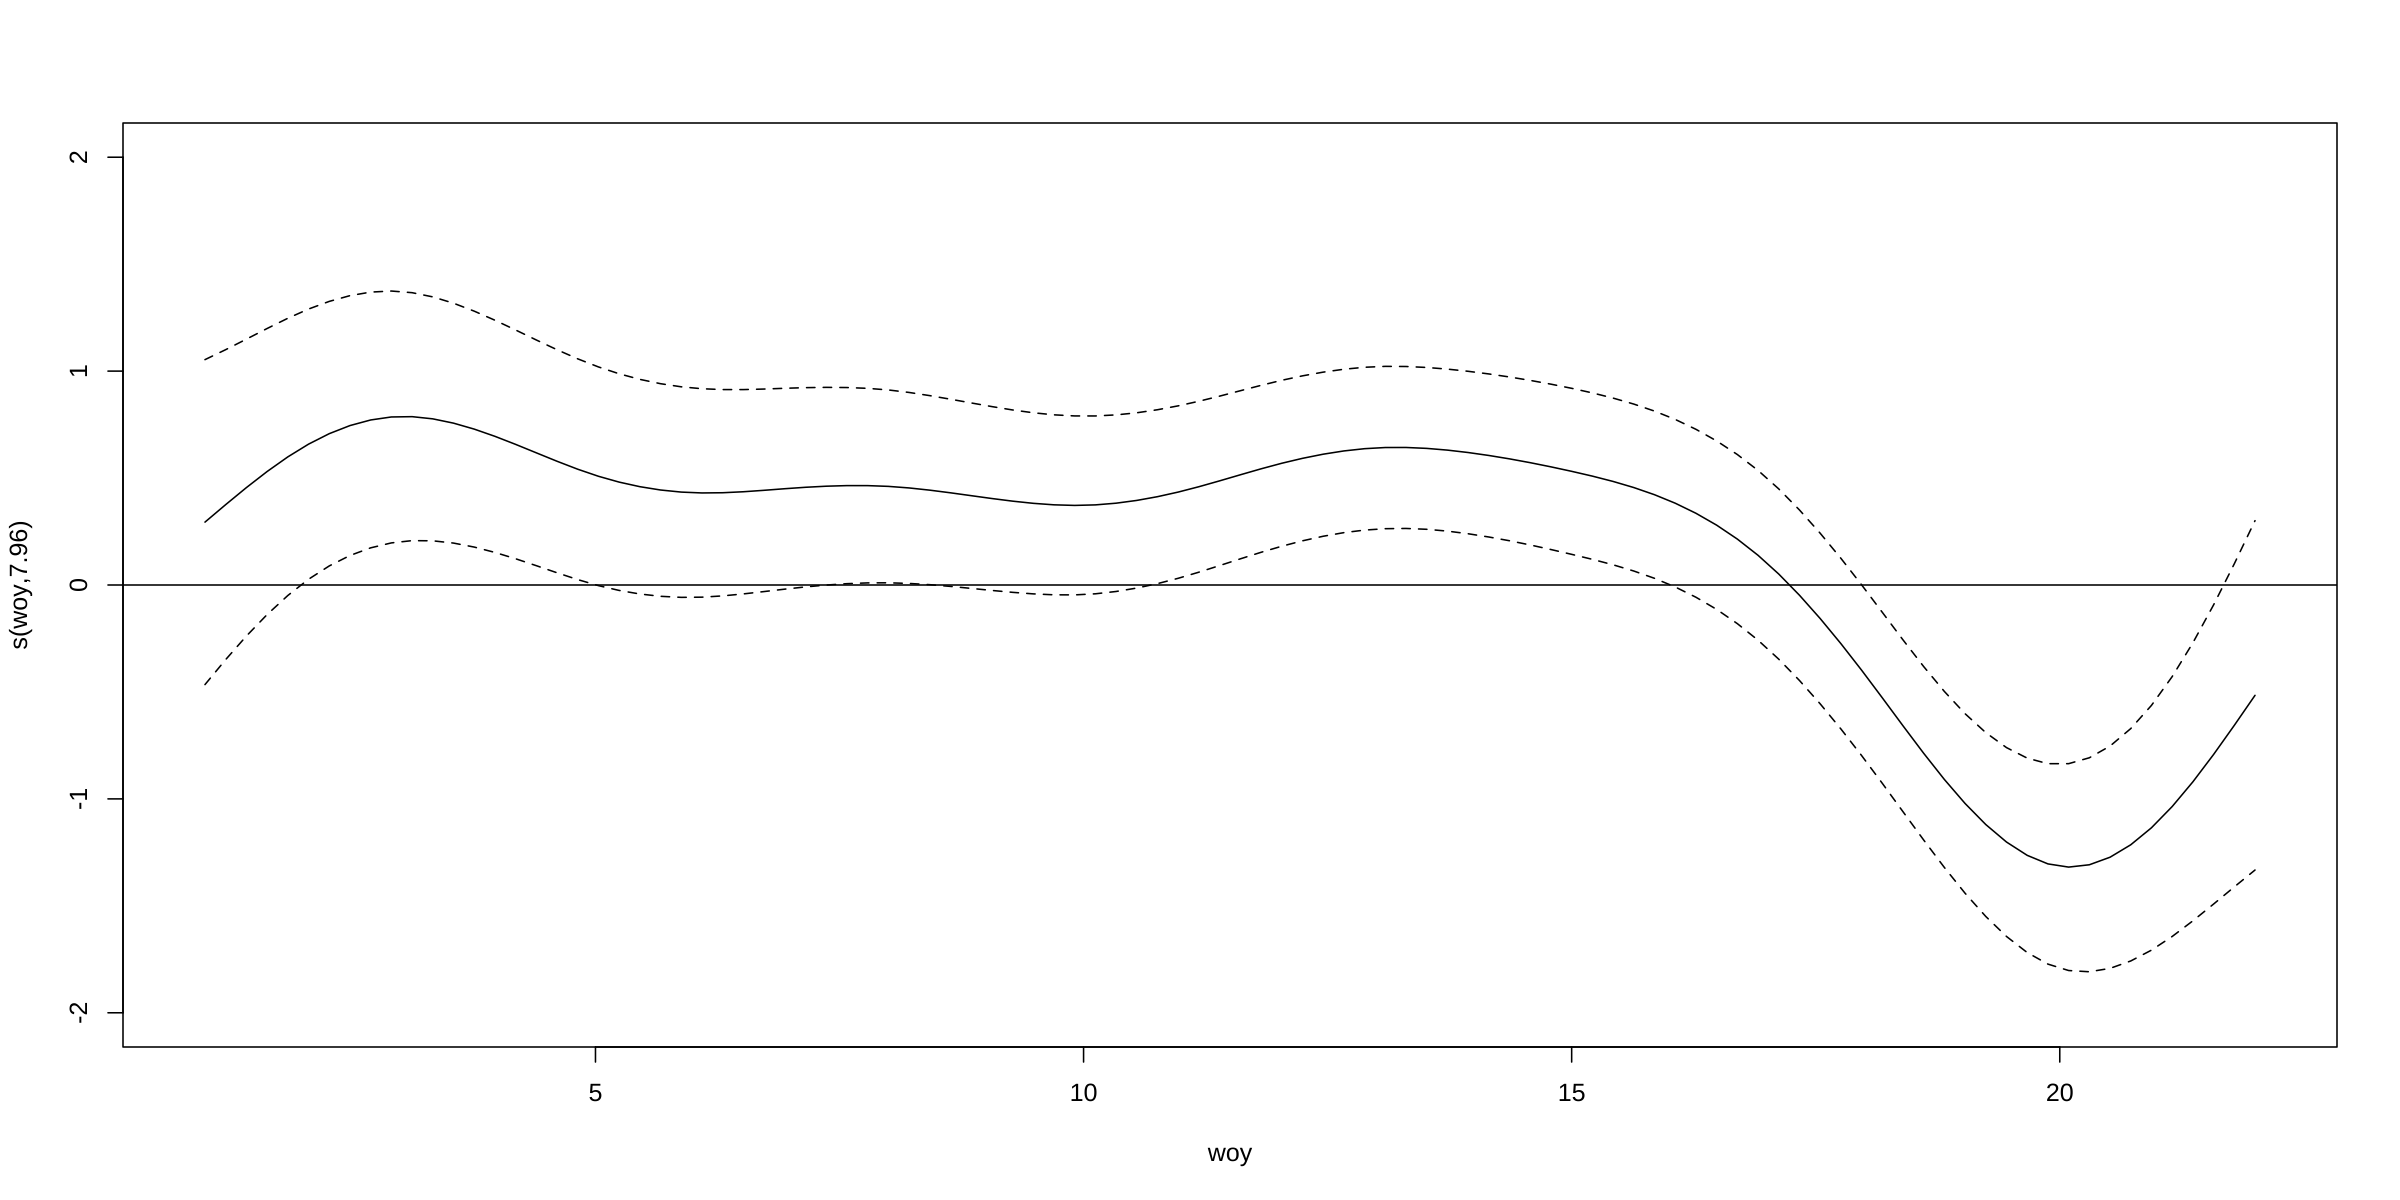

In [58]:
plot(m5, select=1, ylim=c(-2,2))
abline(h=0)

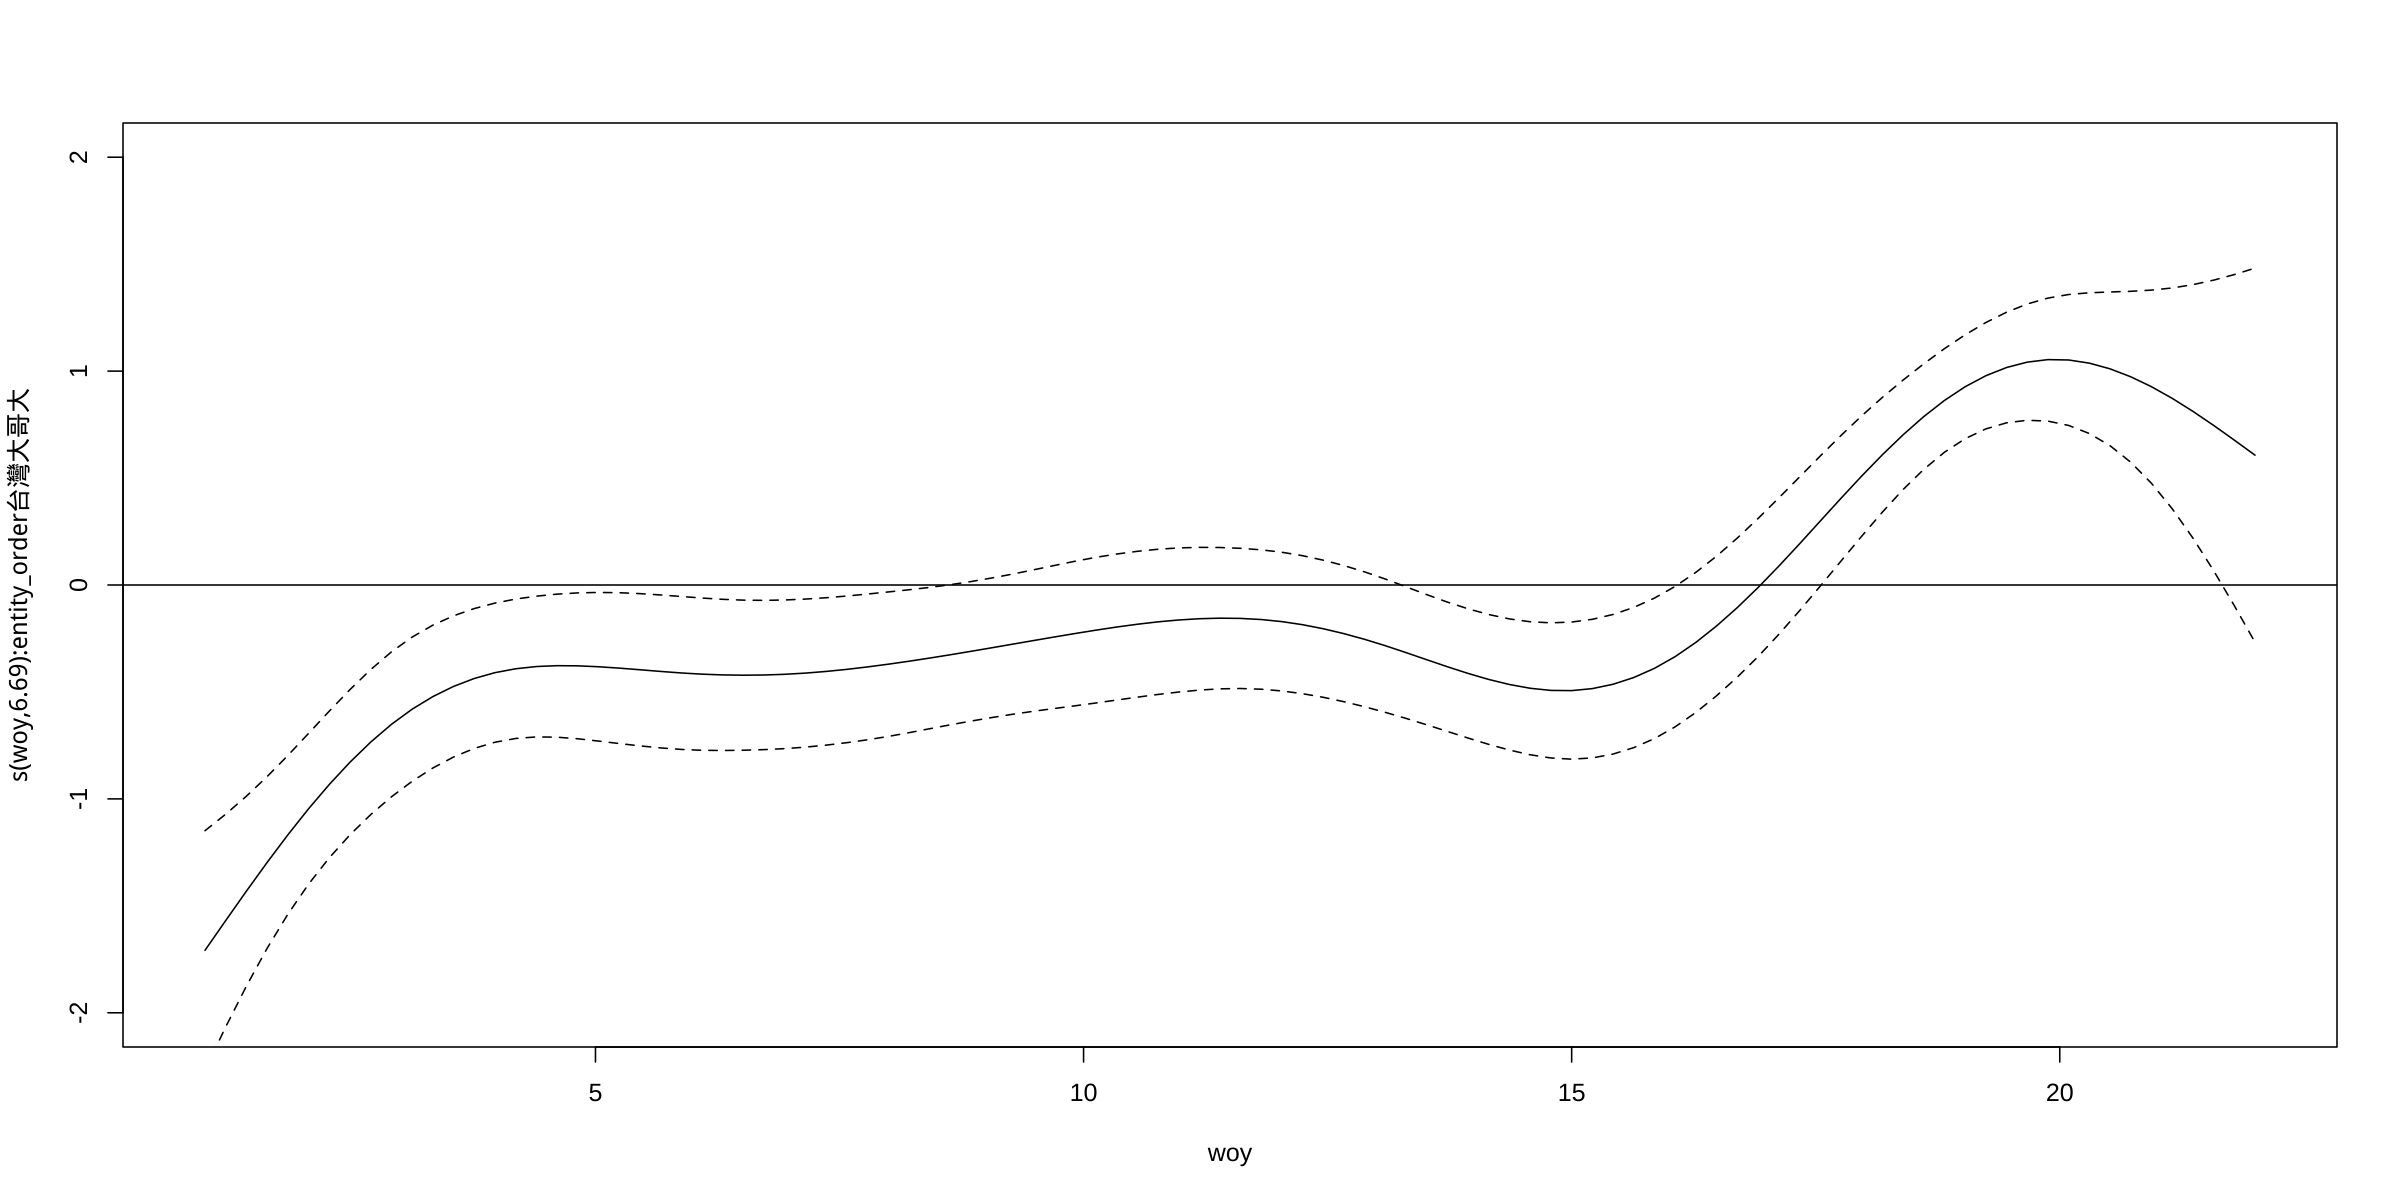

In [61]:
plot(m5, select=4, ylim=c(-2,2))
abline(h=0)

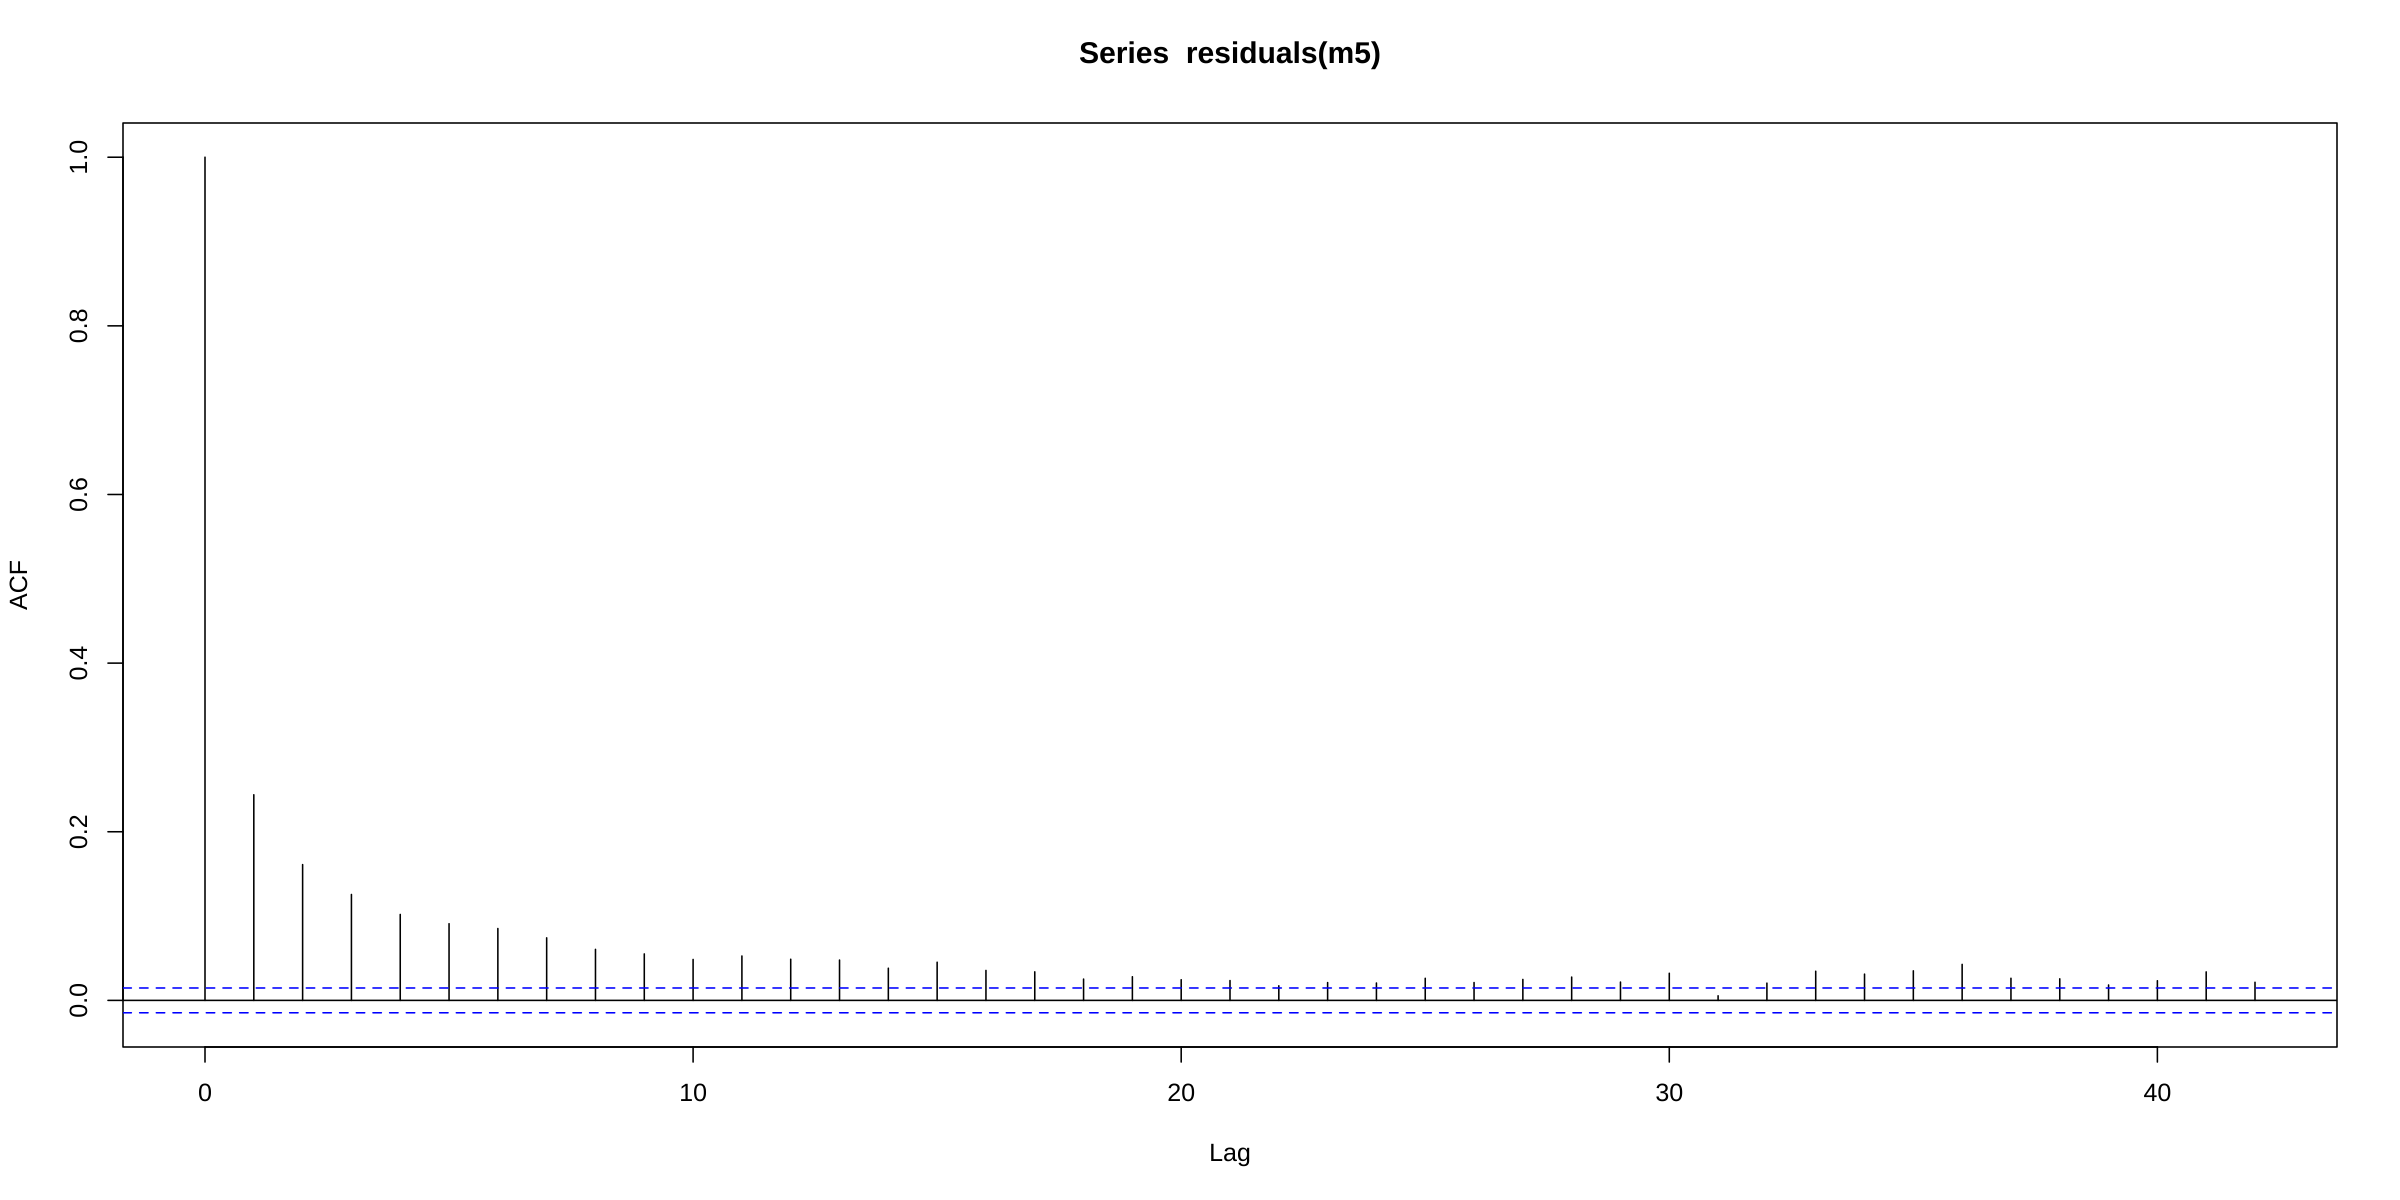

In [66]:
acf(residuals(m5))